In [1]:
import scanpy as sc 
import pandas as pd
import anndata 
import scanorama
import CococoNet_reader 
from scipy import sparse
import numpy as np
from tqdm.notebook import tqdm

In [2]:
maize_cccnt = CococoNet_reader.read_cococonet('maize')
arabi_cccnt = CococoNet_reader.read_cococonet('arabidopsis')

In [3]:
co_expressalog_map_85 = pd.read_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/true_pair_dataframe_at_80_tolerance.csv')


In [4]:
maize_Data = sc.read_10x_mtx('/data/passala/Collaborator_Data/GEO_sourced_single_cell_for_CRUSH/Maize_nitrate_root_SC/Cell_ranger_output_folder/Full_output/cells_with_nitrate/outs/filtered_feature_bc_matrix')

In [5]:
maize_Data.var['feature_types'].value_counts()

Gene Expression    46430
Name: feature_types, dtype: int64

In [6]:
arabidopsis_matrix_panda = pd.read_csv('/data/passala/Collaborator_Data/GEO_sourced_single_cell_for_CRUSH/Arabidopsis/mol_plant_paper/annotated_from_github/norm_data_arabidopsis.csv')

In [7]:
arabidopsis_matrix_panda

AAACCTGAGAATTCCC  AAACCTGAGGGCACTA  AAACCTGAGTAATCCC  \
AT1G01010              0.00              0.00               0.0   
AT1G01020              0.00              0.00               0.0   
AT1G01030              0.00              0.00               0.0   
AT1G01040              1.30              0.00               0.0   
AT1G01050              1.30              1.53               0.0   
...                     ...               ...               ...   
ATMG01350              0.00              0.00               0.0   
ATMG01360              1.85              0.00               0.0   
ATMG01370              1.30              0.00               0.0   
ATMG01390              1.85              2.11               0.0   
ATMG01410              0.00              0.00               0.0   

           AAACCTGAGTACGTTC  AAACCTGAGTATTGGA  AAACCTGCAAAGGAAG  \
AT1G01010              1.41              0.00              0.00   
AT1G01020              0.00              0.00              0.00   
AT1G01030              0.00              0.00              0.00   
AT1G01040              0.00              0.00              0.00   
AT1G01050              0.00              2.17              1.59   
...                     ...               ...               ...   
ATMG01350              0.00              0.00              0.00   
ATMG01360              0.00              0.00              0.00   
ATMG01370              0.00              0.00              0.00   
ATMG01390              0.00              0.00              2.81   
ATMG01410              0.00              0.00              0.00   

           AAACCTGCACTCAGGC  AAACCTGCATGCAATC  AAACCTGCATGGTTGT  \
AT1G01010              0.00              0.96               0.0   
AT1G01020              0.00              0.00               0.0   
AT1G01030              0.00              0.00               0.0   
AT1G01040              1.57              0.00               0.0   
AT1G01050              0.00              1.22               0.0   
...                     ...               ...               ...   
ATMG01350              0.00              0.00               0.0   
ATMG01360              0.00              0.59               0.0   
ATMG01370              0.00              0.00               0.0   
ATMG01390              1.57              0.00               0.0   
ATMG01410              0.00              0.00               0.0   

           AAACCTGCATTCTCAT  ...  TTTGTCAAGTTCGCAT  TTTGTCAAGTTTGCGT  \
AT1G01010              0.00  ...              0.27              0.00   
AT1G01020              0.00  ...              0.48              0.00   
AT1G01030              0.00  ...              0.00              0.00   
AT1G01040              0.00  ...              0.00              0.00   
AT1G01050              1.16  ...              0.00              0.00   
...                     ...  ...               ...               ...   
ATMG01350              0.00  ...              0.00              0.00   
ATMG01360              0.00  ...              0.48              1.81   
ATMG01370              0.00  ...              0.00              0.00   
ATMG01390              2.48  ...              0.27              1.49   
ATMG01410              0.00  ...              0.00              0.00   

           TTTGTCACAGGGCATA  TTTGTCACATTTCACT  TTTGTCAGTCAATGTC  \
AT1G01010              0.00              0.00              1.23   
AT1G01020              0.00              0.00              0.00   
AT1G01030              0.00              0.00              0.00   
AT1G01040              0.00              0.00              0.00   
AT1G01050              1.16              2.02              1.23   
...                     ...               ...               ...   
ATMG01350              0.00              0.00              0.00   
ATMG01360              0.00              0.00              0.00   
ATMG01370              0.00              0.00              0.00   
ATMG01390              1.16              2.02              0.

In [8]:
arabidopsis_matrix_panda = arabidopsis_matrix_panda.T
arabidopsis_matrix_panda

AT1G01010  AT1G01020  AT1G01030  AT1G01040  AT1G01050  \
AAACCTGAGAATTCCC       0.00        0.0        0.0        1.3       1.30   
AAACCTGAGGGCACTA       0.00        0.0        0.0        0.0       1.53   
AAACCTGAGTAATCCC       0.00        0.0        0.0        0.0       0.00   
AAACCTGAGTACGTTC       1.41        0.0        0.0        0.0       0.00   
AAACCTGAGTATTGGA       0.00        0.0        0.0        0.0       2.17   
...                     ...        ...        ...        ...        ...   
TTTGTCATCAAGGCTT       0.00        0.0        0.0        0.0       0.00   
TTTGTCATCCCACTTG       0.00        0.0        0.0        0.0       0.00   
TTTGTCATCCTGCCAT       0.00        0.0        0.0        0.0       1.03   
TTTGTCATCCTTCAAT       1.68        0.0        0.0        0.0       1.68   
TTTGTCATCTCTGCTG       0.93        0.0        0.0        0.0       1.97   

                  AT1G01060  AT1G01070  AT1G01080  AT1G01090  AT1G01100  ...  \
AAACCTGAGAATTCCC       1.30       0.00        0.0       1.30       3.11  ...   
AAACCTGAGGGCACTA       0.00       0.00        0.0       0.00       0.00  ...   
AAACCTGAGTAATCCC       1.62       0.00        0.0       0.00       0.00  ...   
AAACCTGAGTACGTTC       0.00       0.00        0.0       0.00       1.41  ...   
AAACCTGAGTATTGGA       0.00       0.00        0.0       0.00       1.82  ...   
...                     ...        ...        ...        ...        ...  ...   
TTTGTCATCAAGGCTT       0.00       0.00        0.0       0.00       0.00  ...   
TTTGTCATCCCACTTG       0.00       0.00        0.0       1.26       0.00  ...   
TTTGTCATCCTGCCAT       0.00       0.00        0.0       0.00       2.30  ...   
TTTGTCATCCTTCAAT       0.00       0.00        0.0       0.00       0.00  ...   
TTTGTCATCTCTGCTG       0.00       0.93        0.0       0.93       0.00  ...   

                  ATMG01200  ATMG01220  ATMG01280  ATMG01320  ATMG01330  \
AAACCTGAGAATTCCC        0.0        0.0        0.0        0.0        0.0   
AAACCTGAGGGCACTA        0.0        0.0        0.0        0.0        0.0   
AAACCTGAGTAATCCC        0.0        0.0        0.0        0.0        0.0   
AAACCTGAGTACGTTC        0.0        0.0        0.0        0.0        0.0   
AAACCTGAGTATTGGA        0.0        0.0        0.0        0.0        0.0   
...                     ...        ...        ...        ...        ...   
TTTGTCATCAAGGCTT        0.0        0.0        0.0        0.0        0.0   
TTTGTCATCCCACTTG        0.0        0.0        0.0        0.0        0.0   
TTTGTCATCCTGCCAT        0.0        0.0        0.0        0.0        0.0   
TTTGTCATCCTTCAAT        0.0        0.0        0.0        0.0        0.0   
TTTGTCATCTCTGCTG        0.0        0.0        0.0        0.0        0.0   

                  ATMG01350  ATMG01360  ATMG01370  ATMG01390  ATMG01410  
AAACCTGAGAATTCCC        0.0       1.85        1.3       1.85        0.0  
AAACCTGAGGGCACTA        0.0       0.00        0.0       2.11        0.0  
AAACCTGAGTAATCCC        0.0       0.00        0.0       0.00        0.0  
AAACCTGAGTACGTTC        0.0       0.00        0.0       0.00        0.0  
AAACCTGAGTATTGGA        0.0       0.00        0.0       0.00        0.0  
...                     ...        ...        ...        ...        ...  
TTTGTCATCAAGGCTT        0.0       0.00        0.0       0.00        0.0  
TTTGTCATCCCACTTG        0.0       0.00        0.0       0.00        0.0  
TTTGTCATCCTGCCAT        0.0       0.00        0.0       0.00        0.0  
TTTGTCATCCTTCAAT        0.0       0.00        0.0       1.68        0.0  
TTTGTCATCTCTGCTG        0.0       1.97        0.0       0.93        0.0  

[7695 rows x 23161 columns]

In [9]:
arabidopsis_sc = anndata.AnnData(X = arabidopsis_matrix_panda.values, obs = arabidopsis_matrix_panda.index.to_list(), var = arabidopsis_matrix_panda.columns.to_list())
arabidopsis_sc

/tmp/ipykernel_705471/1248425317.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  arabidopsis_sc = anndata.AnnData(X = arabidopsis_matrix_panda.values, obs = arabidopsis_matrix_panda.index.to_list(), var = arabidopsis_matrix_panda.columns.to_list())


AnnData object with n_obs × n_vars = 7695 × 23161
    obs: 0
    var: 0

In [10]:
arabidopsis_sc.var.columns = ['Gene Name']
arabidopsis_sc.var = arabidopsis_sc.var.reindex(arabidopsis_sc.var['Gene Name'])
arabidopsis_sc.obs.columns = ['Barcode']
arabidopsis_sc.obs = arabidopsis_sc.obs.reindex(arabidopsis_sc.obs['Barcode'])

In [11]:
arabidopsis_sc.var['In CoCoCoNet'] = 0
arabidopsis_sc.var['In CoCoCoNet'].loc[arabidopsis_sc.var.index.isin(arabi_cccnt.index)] = 1
arabidopsis_sc = arabidopsis_sc[:,arabidopsis_sc.var['In CoCoCoNet'] == 1]
arabidopsis_sc

/tmp/ipykernel_705471/1318293783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arabidopsis_sc.var['In CoCoCoNet'].loc[arabidopsis_sc.var.index.isin(arabi_cccnt.index)] = 1


View of AnnData object with n_obs × n_vars = 7695 × 19895
    obs: 'Barcode'
    var: 'Gene Name', 'In CoCoCoNet'

In [12]:
maize_Data.var['In CoCoCoNet'] = 0
maize_Data.var['In CoCoCoNet'].loc[maize_Data.var['gene_ids'].isin(maize_cccnt.index)] = 1
maize_Data = maize_Data[:,maize_Data.var['In CoCoCoNet'] == 1]
maize_Data

/tmp/ipykernel_705471/104753113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maize_Data.var['In CoCoCoNet'].loc[maize_Data.var['gene_ids'].isin(maize_cccnt.index)] = 1


View of AnnData object with n_obs × n_vars = 4101 × 25955
    var: 'gene_ids', 'feature_types', 'In CoCoCoNet'

In [13]:
sc.pp.normalize_total(maize_Data, target_sum=1e4)
sc.pp.log1p(maize_Data)

sc.pp.highly_variable_genes(maize_Data, min_mean=0.0125, max_mean=3, min_disp=0.5)
#sc.pl.highly_variable_genes(maize_Data)


/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [14]:
#maize_Data.raw = maize_Data
sc.set_figure_params(facecolor = 'white', figsize = (15,15))
sc.tl.pca(maize_Data, svd_solver='arpack', random_state= 200)
sc.pp.neighbors(maize_Data, n_neighbors=30, n_pcs=50, random_state= 500)
sc.tl.umap(maize_Data, random_state= 221)
sc.tl.leiden(maize_Data, random_state= 1000)

#sc.pl.umap(maize_Data, color = 'leiden',palette= 'tab20', s=50)

In [15]:
maize_Data.obs['Cell Cluster Annotation'] = 'Not Annotatoed'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'] == '4'] = 'Epidermis'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'] == '14'] = 'Root Hair'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['8','0','1','7','10', '12', '3'])] = 'Cortex'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['9','5','13'])] = 'Phloem'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['2','6', '15'])] = 'Stele'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['17','11'])] = 'Meristematic'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'] == '16'] = 'Stele'




/tmp/ipykernel_705471/2911869250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'] == '4'] = 'Epidermis'
/tmp/ipykernel_705471/2911869250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'] == '14'] = 'Root Hair'
/tmp/ipykernel_705471/2911869250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [16]:
#sc.pl.umap(maize_Data, color = 'leiden',palette= 'tab20', s=50, legend_loc = 'on data')

In [17]:
#sc.pl.umap(maize_Data, color = 'Cell Cluster Annotation',palette= 'tab20', s=50, legend_loc = 'on data')

In [18]:
#sc.pl.umap(maize_Data, color =['leiden', 'Zm00001d049541'] ,palette= 'tab20', s=50)
#sc.pl.umap(maize_Data, color ='Zm00001d001779' , s=80)

In [19]:
sc.pp.highly_variable_genes(arabidopsis_sc, min_mean=0.0125, max_mean=3, min_disp=0.5)
#sc.pl.highly_variable_genes(arabidopsis_sc)



/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [20]:
sc.tl.pca(arabidopsis_sc, svd_solver='arpack', random_state= 321)
sc.pp.neighbors(arabidopsis_sc, n_neighbors=20, n_pcs=50, random_state= 75)
sc.tl.umap(arabidopsis_sc, random_state= 267)
sc.tl.leiden(arabidopsis_sc, random_state= 143)

#sc.pl.umap(arabidopsis_sc, color = 'leiden',palette= 'tab20', s=50)

In [21]:
umap_df = pd.DataFrame(data = arabidopsis_sc.obsm['X_umap'], columns = ['Axis 1','Axis 2'], index = arabidopsis_sc.obs.index)
umap_df

Axis 1     Axis 2
Barcode                               
AAACCTGAGAATTCCC  12.415882   6.083405
AAACCTGAGGGCACTA -20.025967   7.689164
AAACCTGAGTAATCCC   6.506667  12.040573
AAACCTGAGTACGTTC   7.306907   9.832688
AAACCTGAGTATTGGA  10.820136   3.016051
...                     ...        ...
TTTGTCATCAAGGCTT   9.603496   3.542099
TTTGTCATCCCACTTG   7.082306  -5.105612
TTTGTCATCCTGCCAT  11.558331   5.043017
TTTGTCATCCTTCAAT -19.366932   7.539859
TTTGTCATCTCTGCTG   6.139478   1.473071

[7695 rows x 2 columns]

In [22]:
umap_df['Axis 1'].sort_values().head(831)

Barcode
CGCTTCAGTTCCCTTG   -22.373665
ACCTTTACATACAGCT   -22.273302
CGCGGTAGTCATATGC   -22.259459
CCGTGGAAGATATACG   -22.230085
GACGTGCAGGCTACGA   -22.223192
                      ...    
CCCATACCATAGGATA   -18.809650
TCAGCTCTCCTAGTGA   -18.730679
CTACGTCGTTCTGGTA   -18.653570
GATGCTAAGTGCCATT   -18.634516
TGCGTGGAGTGACATA   -18.633524
Name: Axis 1, Length: 831, dtype: float32

In [23]:
bad_values = umap_df.sort_values(by = 'Axis 1').head(831).index
good_obs = arabidopsis_sc.obs.loc[~arabidopsis_sc.obs.index.isin(bad_values)]
arabidopsis_sc  = arabidopsis_sc[good_obs.index,:]


In [24]:
#sc.pl.umap(arabidopsis_sc, color = 'leiden',palette= 'tab20', s=50, legend_loc= 'on data')

In [25]:
#sc.pl.umap(arabidopsis_sc, color ='AT5G48070' , s=80)

In [26]:
types_to_include_in_mapping = ['Epidermis','Root Hair','Phloem','Stele','Meristematic']

In [27]:
arabidopsis_sc.obs['Cell Cluster Annotation'] = 'Not Annotatoed'
arabidopsis_sc.obs['Cell Cluster Annotation'].loc[arabidopsis_sc.obs['leiden'].isin(['19', '2'])] = 'Epidermis'
arabidopsis_sc.obs['Cell Cluster Annotation'].loc[arabidopsis_sc.obs['leiden'] == '10'] = 'Root Hair'
arabidopsis_sc.obs['Cell Cluster Annotation'].loc[arabidopsis_sc.obs['leiden'].isin(['21'])] = 'Cortex'
arabidopsis_sc.obs['Cell Cluster Annotation'].loc[arabidopsis_sc.obs['leiden'].isin(['0','8','18'])] = 'Phloem'
arabidopsis_sc.obs['Cell Cluster Annotation'].loc[arabidopsis_sc.obs['leiden'].isin(['6','15', '9','13','14','15'])] = 'Stele'
arabidopsis_sc.obs['Cell Cluster Annotation'].loc[arabidopsis_sc.obs['leiden'].isin(['5','17','20'])] = 'Meristematic'
arabidopsis_sc.obs['Cell Cluster Annotation'].loc[arabidopsis_sc.obs['leiden'].isin(['3','4','7','11','12','16','22'])] = 'Unknown/Not Used For Combination'


/tmp/ipykernel_705471/23983124.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  arabidopsis_sc.obs['Cell Cluster Annotation'] = 'Not Annotatoed'
/tmp/ipykernel_705471/23983124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arabidopsis_sc.obs['Cell Cluster Annotation'].loc[arabidopsis_sc.obs['leiden'].isin(['19', '2'])] = 'Epidermis'
/tmp/ipykernel_705471/23983124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arabidopsis_sc.obs['Cell Cluster Annotation'].loc[arabidopsis_sc.obs['leiden'] == '10'] = 'Root Hair'
/tmp/ipykernel_705471/23983124.py:4: Sett

In [28]:
#sc.pl.umap(arabidopsis_sc, color = 'Cell Cluster Annotation',palette= 'tab20', s=50, legend_loc = 'on data')

In [29]:
arabidopsis_sc.var['Gene Name'] = arabidopsis_sc.var.index
arabidopsis_sc.var = arabidopsis_sc.var.rename(columns = {'Gene Name':'Gene ID'})
arabidopsis_sc.var = arabidopsis_sc.var.merge(right = co_expressalog_map_85, right_on = 'Arabidopsis Gene', how = 'left', left_on= 'Gene ID')
arabidopsis_sc.var

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


Gene ID  In CoCoCoNet  highly_variable     means  dispersions  \
0      AT1G01020             1            False  0.201025     0.910928   
1      AT1G01030             1            False  0.022766     1.057569   
2      AT1G01040             1            False  0.057645     0.975395   
3      AT1G01050             1            False  1.237518     1.313468   
4      AT1G01060             1            False  0.209817     1.143889   
...          ...           ...              ...       ...          ...   
19890  ATMG01350             1            False  0.001509     1.258547   
19891  ATMG01360             1            False  0.515715     1.118924   
19892  ATMG01370             1            False  0.037064     1.036257   
19893  ATMG01390             1            False  1.062062     2.020124   
19894  ATMG01410             1            False  0.001371     1.129837   

       dispersions_norm Arabidopsis Gene      Maize Gene  
0             -0.333120              NaN             NaN  
1              0.022509              NaN             NaN  
2             -0.176779        AT1G01040  Zm00001d027412  
3             -0.853014        AT1G01050  Zm00001d002889  
4              0.231849              NaN             NaN  
...                 ...              ...             ...  
19890          0.509914              NaN             NaN  
19891         -0.567870              NaN             NaN  
19892         -0.029178              NaN             NaN  
19893          0.102415              NaN             NaN  
19894          0.197771              NaN             NaN  

[19895 rows x 8 columns]

In [30]:
arabidopsis_sc.var = arabidopsis_sc.var.set_index('Gene ID')
arabidopsis_sc.var

In CoCoCoNet  highly_variable     means  dispersions  \
Gene ID                                                           
AT1G01020             1            False  0.201025     0.910928   
AT1G01030             1            False  0.022766     1.057569   
AT1G01040             1            False  0.057645     0.975395   
AT1G01050             1            False  1.237518     1.313468   
AT1G01060             1            False  0.209817     1.143889   
...                 ...              ...       ...          ...   
ATMG01350             1            False  0.001509     1.258547   
ATMG01360             1            False  0.515715     1.118924   
ATMG01370             1            False  0.037064     1.036257   
ATMG01390             1            False  1.062062     2.020124   
ATMG01410             1            False  0.001371     1.129837   

           dispersions_norm Arabidopsis Gene      Maize Gene  
Gene ID                                                       
AT1G01020         -0.333120              NaN             NaN  
AT1G01030          0.022509              NaN             NaN  
AT1G01040         -0.176779        AT1G01040  Zm00001d027412  
AT1G01050         -0.853014        AT1G01050  Zm00001d002889  
AT1G01060          0.231849              NaN             NaN  
...                     ...              ...             ...  
ATMG01350          0.509914              NaN             NaN  
ATMG01360         -0.567870              NaN             NaN  
ATMG01370         -0.029178              NaN             NaN  
ATMG01390          0.102415              NaN             NaN  
ATMG01410          0.197771              NaN             NaN  

[19895 rows x 7 columns]

In [31]:
maize_Data.var = maize_Data.var.merge(right = co_expressalog_map_85, how = 'left', right_on= 'Maize Gene', left_on='gene_ids')
maize_Data.var

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


gene_ids    feature_types  In CoCoCoNet  highly_variable  \
0       Zm00001d027231  Gene Expression             1            False   
1       Zm00001d027232  Gene Expression             1            False   
2       Zm00001d027233  Gene Expression             1            False   
3       Zm00001d027236  Gene Expression             1            False   
4       Zm00001d027239  Gene Expression             1            False   
...                ...              ...           ...              ...   
25950  ENSRNA049479090  Gene Expression             1             True   
25951  ENSRNA049478822  Gene Expression             1             True   
25952  ENSRNA049478534  Gene Expression             1             True   
25953  ENSRNA049478530  Gene Expression             1             True   
25954  ENSRNA049478881  Gene Expression             1            False   

              means  dispersions  dispersions_norm Arabidopsis Gene Maize Gene  
0      2.520810e-01     2.164560         -0.380041              NaN        NaN  
1      1.000000e-12          NaN          0.000000              NaN        NaN  
2      6.043349e-04     0.223102         -1.953361              NaN        NaN  
3      2.388622e-02     2.239849          0.489377              NaN        NaN  
4      2.744667e-02     2.052797          0.262814              NaN        NaN  
...             ...          ...               ...              ...        ...  
25950  8.779240e-02     2.556639          0.873081              NaN        NaN  
25951  5.090141e-01     2.678254          1.157485              NaN        NaN  
25952  9.616010e-02     2.586654          0.909436              NaN        NaN  
25953  3.340918e-01     2.660385          1.780093              NaN        NaN  
25954  1.000000e-12          NaN          0.000000              NaN        NaN  

[25955 rows x 9 columns]

In [32]:
arabi_var_names_with_ortholog = arabidopsis_sc.var.dropna().index
arabi_version_of_maize_genes_with_ortholog = maize_Data.var.dropna()['Arabidopsis Gene'].to_list()

arabi_var_names_with_ortholog
overlap_of_shared_genes = arabi_var_names_with_ortholog.intersection(arabi_version_of_maize_genes_with_ortholog)

maize_genes_to_keep = maize_Data.var.loc[maize_Data.var['Arabidopsis Gene'].isin(overlap_of_shared_genes)].index

In [33]:
maize_Data.var = maize_Data.var.set_index('gene_ids')


In [34]:
maize_genes_to_keep

Int64Index([   14,    18,    19,    22,    31,    33,    34,    35,    40,
               45,
            ...
            25879, 25882, 25890, 25902, 25915, 25916, 25929, 25938, 25939,
            25942],
           dtype='int64', length=6047)

In [35]:
maize_single_cell_trimmed_to_orthologs = maize_Data[:,maize_genes_to_keep]
maize_single_cell_trimmed_to_orthologs

View of AnnData object with n_obs × n_vars = 4101 × 6047
    obs: 'leiden', 'Cell Cluster Annotation'
    var: 'feature_types', 'In CoCoCoNet', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Arabidopsis Gene', 'Maize Gene'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [36]:
arabi_single_cell_slimmed_to_orthologs = arabidopsis_sc[:,overlap_of_shared_genes]
arabi_single_cell_slimmed_to_orthologs

View of AnnData object with n_obs × n_vars = 6864 × 6047
    obs: 'Barcode', 'leiden', 'Cell Cluster Annotation'
    var: 'In CoCoCoNet', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Arabidopsis Gene', 'Maize Gene'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [37]:
maize_single_cell_trimmed_to_orthologs.var.index = maize_single_cell_trimmed_to_orthologs.var['Arabidopsis Gene'].to_list()
maize_single_cell_trimmed_to_orthologs.var

feature_types  In CoCoCoNet  highly_variable     means  \
AT4G17610  Gene Expression             1            False  0.055275   
AT3G60340  Gene Expression             1            False  0.384962   
AT5G61520  Gene Expression             1            False  0.009444   
AT5G61510  Gene Expression             1             True  0.127049   
AT2G45180  Gene Expression             1             True  2.323198   
...                    ...           ...              ...       ...   
AT3G56220  Gene Expression             1            False  0.011574   
AT4G10170  Gene Expression             1            False  0.531311   
AT2G15980  Gene Expression             1            False  0.051401   
AT5G51150  Gene Expression             1            False  0.150906   
AT4G17790  Gene Expression             1            False  0.101670   

           dispersions  dispersions_norm Arabidopsis Gene      Maize Gene  
AT4G17610     2.062388          0.274431        AT4G17610  Zm00001d027259  
AT3G60340     2.359472          0.469123        AT3G60340  Zm00001d027267  
AT5G61520     1.492043         -0.416386        AT5G61520  Zm00001d027268  
AT5G61510     2.438514          0.730005        AT5G61510  Zm00001d027276  
AT2G45180     3.834766          1.458219        AT2G45180  Zm00001d027291  
...                ...               ...              ...             ...  
AT3G56220     2.456366          0.751628        AT3G56220  Zm00001d000400  
AT4G10170     2.250245         -0.277641        AT4G10170  Zm00001d000424  
AT2G15980     2.146415          0.376207        AT2G15980  Zm00001d000435  
AT5G51150     2.167209          0.401393        AT5G51150  Zm00001d000436  
AT4G17790     2.022042          0.225563        AT4G17790  Zm00001d000439  

[6047 rows x 8 columns]

In [38]:
order_of_vars = arabi_single_cell_slimmed_to_orthologs.var.index.to_list()
current_order_maize_vars = maize_single_cell_trimmed_to_orthologs.var_names
panda_version_of_maize_x_data = pd.DataFrame(columns = current_order_maize_vars, data = maize_single_cell_trimmed_to_orthologs.X.todense())
re_ordered_version = panda_version_of_maize_x_data.reindex(columns = order_of_vars)
re_ordered_version = sparse.csr_matrix(re_ordered_version.values)
maize_single_cell_trimmed_to_orthologs.X = re_ordered_version
maize_single_cell_trimmed_to_orthologs.var = maize_single_cell_trimmed_to_orthologs.var.reindex(order_of_vars)

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


In [39]:
maize_single_cell_trimmed_to_orthologs.obs['Cluster Before Gene Trimming'] = maize_single_cell_trimmed_to_orthologs.obs['leiden']
#maize_single_cell_trimmed_to_orthologs.uns['Before Trimming Colors'] = maize_single_cell_trimmed_to_orthologs.uns['leiden_colors']
maize_single_cell_trimmed_to_orthologs.obsm['Before Trimming X_umap'] = maize_single_cell_trimmed_to_orthologs.obsm['X_umap']
maize_single_cell_trimmed_to_orthologs

AnnData object with n_obs × n_vars = 4101 × 6047
    obs: 'leiden', 'Cell Cluster Annotation', 'Cluster Before Gene Trimming'
    var: 'feature_types', 'In CoCoCoNet', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Arabidopsis Gene', 'Maize Gene'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap', 'Before Trimming X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [40]:
arabi_single_cell_slimmed_to_orthologs.obs['Cluster Before Gene Trimming'] = arabi_single_cell_slimmed_to_orthologs.obs['leiden']
#arabi_single_cell_slimmed_to_orthologs.uns['Before Trimming Colors'] = arabi_single_cell_slimmed_to_orthologs.uns['leiden_colors']
arabi_single_cell_slimmed_to_orthologs.obsm['Before Trimming X_umap'] = arabi_single_cell_slimmed_to_orthologs.obsm['X_umap']
arabi_single_cell_slimmed_to_orthologs

/tmp/ipykernel_705471/42257091.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  arabi_single_cell_slimmed_to_orthologs.obs['Cluster Before Gene Trimming'] = arabi_single_cell_slimmed_to_orthologs.obs['leiden']


AnnData object with n_obs × n_vars = 6864 × 6047
    obs: 'Barcode', 'leiden', 'Cell Cluster Annotation', 'Cluster Before Gene Trimming'
    var: 'In CoCoCoNet', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Arabidopsis Gene', 'Maize Gene'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap', 'Before Trimming X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [41]:
sc.pp.highly_variable_genes(arabi_single_cell_slimmed_to_orthologs, min_mean=0.0125, max_mean=3, min_disp=0.3)
#sc.pl.highly_variable_genes(arabi_single_cell_slimmed_to_orthologs)


In [42]:
arabi_single_cell_slimmed_to_orthologs =arabi_single_cell_slimmed_to_orthologs[arabi_single_cell_slimmed_to_orthologs.obs.loc[arabi_single_cell_slimmed_to_orthologs.obs['Cell Cluster Annotation'].isin(types_to_include_in_mapping)].index,:]
arabi_single_cell_slimmed_to_orthologs

View of AnnData object with n_obs × n_vars = 4610 × 6047
    obs: 'Barcode', 'leiden', 'Cell Cluster Annotation', 'Cluster Before Gene Trimming'
    var: 'In CoCoCoNet', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Arabidopsis Gene', 'Maize Gene'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap', 'Before Trimming X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [43]:
sc.tl.pca(arabi_single_cell_slimmed_to_orthologs, svd_solver='arpack', random_state= 43)
sc.pp.neighbors(arabi_single_cell_slimmed_to_orthologs, n_neighbors=20, n_pcs=50, random_state= 89)
sc.tl.umap(arabi_single_cell_slimmed_to_orthologs, random_state= 334)
sc.tl.leiden(arabi_single_cell_slimmed_to_orthologs, random_state= 887)

#sc.pl.umap(arabi_single_cell_slimmed_to_orthologs, color = ['leiden','Cluster Before Gene Trimming'], palette= 'tab20', s=50)

In [44]:
## Previous HVG identification is sufficient 
sc.pp.highly_variable_genes(maize_single_cell_trimmed_to_orthologs, min_mean=0.01, max_mean=3, min_disp=0.3) 
#sc.pl.highly_variable_genes(maize_single_cell_trimmed_to_orthologs)


In [45]:
maize_single_cell_trimmed_to_orthologs =maize_single_cell_trimmed_to_orthologs[maize_single_cell_trimmed_to_orthologs.obs.loc[maize_single_cell_trimmed_to_orthologs.obs['Cell Cluster Annotation'].isin(types_to_include_in_mapping)].index,:]
maize_single_cell_trimmed_to_orthologs

View of AnnData object with n_obs × n_vars = 2062 × 6047
    obs: 'leiden', 'Cell Cluster Annotation', 'Cluster Before Gene Trimming'
    var: 'feature_types', 'In CoCoCoNet', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Arabidopsis Gene', 'Maize Gene'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap', 'Before Trimming X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [46]:
sc.tl.pca(maize_single_cell_trimmed_to_orthologs, svd_solver='arpack', random_state= 43)
sc.pp.neighbors(maize_single_cell_trimmed_to_orthologs, n_neighbors=20, n_pcs=50, random_state= 89)
sc.tl.umap(maize_single_cell_trimmed_to_orthologs, random_state= 334)
sc.tl.leiden(maize_single_cell_trimmed_to_orthologs, random_state= 887)

#sc.pl.umap(maize_single_cell_trimmed_to_orthologs, color = ['leiden','Cluster Before Gene Trimming'], palette= 'tab20', s=50)

In [47]:
maize_single_cell_trimmed_to_orthologs.obs['Original Cell Cluster Annotation'] = maize_single_cell_trimmed_to_orthologs.obs['Cell Cluster Annotation']
arabi_single_cell_slimmed_to_orthologs.obs['Original Cell Cluster Annotation'] = arabi_single_cell_slimmed_to_orthologs.obs['Cell Cluster Annotation']

In [48]:
#sc.pl.umap(maize_single_cell_trimmed_to_orthologs, color = ['leiden','Cell Cluster Annotation'], palette= 'tab20', s=50)

In [49]:
# ### Arabidopsis Reference

# sc.tl.ingest(maize_single_cell_trimmed_to_orthologs, arabi_single_cell_slimmed_to_orthologs, obs='Cell Cluster Annotation')

# maize_single_cell_trimmed_to_orthologs.uns['leiden_colors'] = arabi_single_cell_slimmed_to_orthologs.uns['leiden_colors']  # fix colors

# concatendated_arabi_maize_dataset = arabi_single_cell_slimmed_to_orthologs.concatenate(maize_single_cell_trimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Arabidopsis','Maize'])
# concatendated_arabi_maize_dataset.obs.leiden = concatendated_arabi_maize_dataset.obs.leiden.astype('category')
# concatendated_arabi_maize_dataset.obs.leiden.cat.reorder_categories(arabi_single_cell_slimmed_to_orthologs.obs.leiden.cat.categories, inplace=True)  # fix category ordering
# concatendated_arabi_maize_dataset.uns['leiden_colors'] = arabi_single_cell_slimmed_to_orthologs.uns['leiden_colors'] 
# sc.pl.umap(concatendated_arabi_maize_dataset, color=['Species', 'leiden'], s= 50)


In [50]:
#sc.pl.umap(concatendated_arabi_maize_dataset, color=['Species', 'Cell Cluster Annotation'], s= 50)


In [51]:
#sc.pl.umap(concatendated_arabi_maize_dataset, color=['Species'], s= 25)

In [52]:
#sc.pl.umap(concatendated_arabi_maize_dataset, color=['Original Cell Cluster Annotation'], s= 25)


In [53]:
# subset = concatendated_arabi_maize_dataset[concatendated_arabi_maize_dataset.obs['Original Cell Cluster Annotation'] == 'Stele']
# sc.pl.umap(subset, color=['Species'], s= 25)

In [54]:
import pymn

# pymn.variableGenes(concatendated_arabi_maize_dataset,study_col = 'Species')
# pymn.MetaNeighborUS(concatendated_arabi_maize_dataset,study_col = 'Species',ct_col = 'Original Cell Cluster Annotation')
# g = pymn.plotMetaNeighborUS(concatendated_arabi_maize_dataset,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False,)
# #g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/new_data_only_across_species.jpg')

In [55]:
# sc.pl.umap(concatendated_arabi_maize_dataset, color=['Species', 'leiden'], s= 50)


In [56]:
# ### Maize Reference -- Worse than Arabidopsis Reference

# sc.tl.ingest(arabi_single_cell_slimmed_to_orthologs, maize_single_cell_trimmed_to_orthologs, obs='Cell Cluster Annotation')

# arabi_single_cell_slimmed_to_orthologs.uns['leiden_colors'] = maize_single_cell_trimmed_to_orthologs.uns['leiden_colors']  # fix colors

# concatendated_arabi_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(arabi_single_cell_slimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Maize','Arabidopsis'])
# concatendated_arabi_maize_dataset.obs.leiden = concatendated_arabi_maize_dataset.obs.leiden.astype('category')
# #concatendated_arabi_maize_dataset.obs.leiden.cat.reorder_categories(maize_single_cell_trimmed_to_orthologs.obs.leiden.cat.categories, inplace=True)  # fix category ordering
# concatendated_arabi_maize_dataset.uns['leiden_colors'] = maize_single_cell_trimmed_to_orthologs.uns['leiden_colors'] 
# sc.pl.umap(concatendated_arabi_maize_dataset, color=['Species', 'Cell Cluster Annotation'], s= 50)

In [57]:
# sc.pl.umap(concatendated_arabi_maize_dataset, color=['Species', 'Cell Cluster Annotation'], s= 50)

In [58]:
# sc.pl.umap(concatendated_arabi_maize_dataset, color=['Original Cell Cluster Annotation'], s= 25)


In [59]:
# subset = concatendated_arabi_maize_dataset[concatendated_arabi_maize_dataset.obs['Original Cell Cluster Annotation'] == 'Stele']
# sc.pl.umap(subset, color=['Species'], s= 25)

In [60]:
# import pymn

# pymn.variableGenes(concatendated_arabi_maize_dataset,study_col = 'Species')
# pymn.MetaNeighborUS(concatendated_arabi_maize_dataset,study_col = 'Species',ct_col = 'Original Cell Cluster Annotation')
# g = pymn.plotMetaNeighborUS(concatendated_arabi_maize_dataset,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False,)
# #g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/new_data_only_across_species.jpg')

In [61]:

## BBKNN -- Sucks
# sc.tl.pca(concatendated_arabi_maize_dataset)
# sc.external.pp.bbknn(concatendated_arabi_maize_dataset, batch_key='Species')
# sc.tl.umap(concatendated_arabi_maize_dataset)
# sc.pl.umap(concatendated_arabi_maize_dataset, color=['Species', 'leiden'], s= 50)

In [62]:
# concatendated_arabi_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(arabi_single_cell_slimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Maize','Arabidopsis'])


In [63]:
## Scanorama Tutorial Way -- Doesn't work
# concatendated_arabi_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(arabi_single_cell_slimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Maize','Arabidopsis'])

# adatas = [maize_single_cell_trimmed_to_orthologs,arabi_single_cell_slimmed_to_orthologs]
# scanorama.integrate_scanpy(adatas, dimred = 50)
# scanorama_int = [ad.obsm['X_scanorama'] for ad in adatas]

# # make into one matrix.
# all_s = np.concatenate(scanorama_int)
# print(all_s.shape)

# # add to the AnnData object
# concatendated_arabi_maize_dataset.obsm["Scanorama"] = all_s
# sc.pp.neighbors(concatendated_arabi_maize_dataset, n_pcs =50, use_rep = "Scanorama")
# sc.tl.umap(concatendated_arabi_maize_dataset)
# sc.pl.umap(concatendated_arabi_maize_dataset, color=['Species', 'leiden'], s= 50)

In [64]:
# ## External Scanpy Tutorial Docs Page Way 

# concatendated_arabi_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(arabi_single_cell_slimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Maize','Arabidopsis'])

# sc.pp.highly_variable_genes(concatendated_arabi_maize_dataset, min_mean=0.01, max_mean=3, min_disp=0.3) 

# #sc.tl.pca(concatendated_arabi_maize_dataset, svd_solver='arpack', random_state= 567)
# sc.external.pp.scanorama_integrate(concatendated_arabi_maize_dataset, 'Species')

# sc.pp.neighbors(concatendated_arabi_maize_dataset, n_neighbors=20, n_pcs=50, random_state= 22, use_rep= 'X_scanorama' )
# sc.tl.umap(concatendated_arabi_maize_dataset, random_state= 632)
# sc.tl.leiden(concatendated_arabi_maize_dataset, random_state= 344)

# sc.pl.umap(concatendated_arabi_maize_dataset, color = ['Species','Cluster Before Gene Trimming'], palette= 'tab20', s=50)


In [65]:
# maize_subset = concatendated_arabi_maize_dataset[concatendated_arabi_maize_dataset.obs['Species'] == 'Maize']
# arabidopsis_subset = concatendated_arabi_maize_dataset[concatendated_arabi_maize_dataset.obs['Species'] == 'Arabidopsis']
# sc.pl.umap(maize_subset, color = 'Cluster Before Gene Trimming', palette= 'tab20', s=50)

In [66]:
# sc.pl.umap(arabidopsis_subset, color = 'Cluster Before Gene Trimming', palette= 'tab20', s=50)

In [67]:
# ### Scanorama as in Validating By cutting in half 

# import scanorama
# concatendated_arabi_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(arabi_single_cell_slimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Maize','Arabidopsis'])
# #sc.tl.pca(concatenated_alpha_beta_database, svd_solver='arpack', )


# sc.external.pp.scanorama_integrate(concatendated_arabi_maize_dataset,'Species')
# sc.pp.neighbors(concatendated_arabi_maize_dataset, n_neighbors = 10, n_pcs = 40, use_rep= 'X_scanorama', random_state = 2204)
# sc.tl.umap(concatendated_arabi_maize_dataset, random_state= 243)
# sc.pl.umap(concatendated_arabi_maize_dataset, color= ['Species', 'Original Cell Cluster Annotation'], s = 40,)

In [ ]:
### Testing Subsampling after scanorama

import scanorama
concatendated_arabi_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(arabi_single_cell_slimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Maize','Arabidopsis'])
#sc.tl.pca(concatenated_alpha_beta_database, svd_solver='arpack', )
sc.external.pp.scanorama_integrate(concatendated_arabi_maize_dataset,'Species')



# sc.pp.neighbors(concatendated_arabi_maize_dataset, n_neighbors = 10, n_pcs = 40, use_rep= 'X_scanorama', random_state = 2204)
# sc.tl.umap(concatendated_arabi_maize_dataset, random_state= 243)
# sc.pl.umap(concatendated_arabi_maize_dataset, color= ['Species', 'Original Cell Cluster Annotation'], s = 40,)

In [94]:
clustering_results = pd.DataFrame(index = concatendated_arabi_maize_dataset.obs.index)
clustering_results

Empty DataFrame
Columns: []
Index: [AAACCCAAGAGCAGCT-1-Maize, AAACCCAAGCACCGTC-1-Maize, AAACCCAGTGATCATC-1-Maize, AAACCCATCAGACCCG-1-Maize, AAACGAACAGATAAAC-1-Maize, AAACGAACATCGTGCG-1-Maize, AAACGAATCGAACACT-1-Maize, AAACGCTCAGGCACTC-1-Maize, AAACGCTGTGTTCGAT-1-Maize, AAAGAACAGGAAAGAC-1-Maize, AAAGAACGTCCAGTTA-1-Maize, AAAGGATGTCGCAGTC-1-Maize, AAAGGATTCGACGCGT-1-Maize, AAAGGGCGTCACGACC-1-Maize, AAAGGGCGTGGTCTTA-1-Maize, AAAGGTACACGAGAAC-1-Maize, AAAGGTACATGAATCC-1-Maize, AAAGGTAGTCCAACGC-1-Maize, AAAGTCCCAAGTATAG-1-Maize, AAAGTCCTCCCAGCGA-1-Maize, AAAGTGATCAGGGTAG-1-Maize, AAATGGACAGATTTCG-1-Maize, AAATGGAGTCCAGAAG-1-Maize, AACAAAGAGCATGGGT-1-Maize, AACAAAGAGGAGACCT-1-Maize, AACAAAGAGGTGATAT-1-Maize, AACAAAGGTAACCCGC-1-Maize, AACAAAGTCAGCGCGT-1-Maize, AACAAAGTCCCTCTTT-1-Maize, AACAAGATCGGAACTT-1-Maize, AACAGGGCAGGTGTGA-1-Maize, AACAGGGGTCCTGTTC-1-Maize, AACAGGGTCGCCTATC-1-Maize, AACCAACAGGCCGCTT-1-Maize, AACCAACAGGTCCCTG-1-Maize, AACCAACCAAGTTCCA-1-Maize, AACCACATCAGCTCTC-1-Maize, AACCACATCCATCAGA-1-Maize, AACCATGGTGCCTAAT-1-Maize, AACCATGTCGCCGAAC-1-Maize, AACCATGTCTATCGGA-1-Maize, AACGAAATCGACATCA-1-Maize, AACGTCAAGCGTGTCC-1-Maize, AACGTCAGTCCGTACG-1-Maize, AACGTCATCTGTAAGC-1-Maize, AACTTCTAGCAGCCCT-1-Maize, AACTTCTGTCGTCATA-1-Maize, AACTTCTTCCGATGCG-1-Maize, AAGAACAGTCGACGCT-1-Maize, AAGAACAGTGTGGTCC-1-Maize, AAGACAAGTGGAAGTC-1-Maize, AAGACTCCATGTGCCG-1-Maize, AAGACTCGTATACCTG-1-Maize, AAGATAGAGGCTCAAG-1-Maize, AAGATAGCACGGTGAA-1-Maize, AAGATAGTCTGCTCTG-1-Maize, AAGCATCAGTTAGTGA-1-Maize, AAGCGAGTCATCCTAT-1-Maize, AAGCGTTCAACCTATG-1-Maize, AAGCGTTGTGAGGAAA-1-Maize, AAGCGTTTCTTCGACC-1-Maize, AAGTACCAGAAAGCGA-1-Maize, AAGTACCGTGACTGTT-1-Maize, AAGTCGTAGCCTATTG-1-Maize, AAGTCGTGTACCTAGT-1-Maize, AAGTCGTGTCGGTGAA-1-Maize, AAGTGAAAGACGTCGA-1-Maize, AAGTGAAAGGGTATAT-1-Maize, AAGTGAACAACGTATC-1-Maize, AAGTGAAGTGGCATCC-1-Maize, AAGTGAATCTAGCCTC-1-Maize, AAGTTCGAGCGCTTCG-1-Maize, AATAGAGCAGGCTTGC-1-Maize, AATAGAGCATCATGAC-1-Maize, AATAGAGGTAAGTTAG-1-Maize, AATCACGCAGCTCGGT-1-Maize, AATCACGGTATCACGT-1-Maize, AATCGACAGGTCGACA-1-Maize, AATCGACGTAGAGATT-1-Maize, AATCGTGAGGGCAGAG-1-Maize, AATCGTGGTAAGACCG-1-Maize, AATGACCAGAGTCAGC-1-Maize, AATGACCCACCTCTAC-1-Maize, AATGACCGTATCAGGG-1-Maize, AATGACCGTCACGCTG-1-Maize, AATGACCTCAATCCGA-1-Maize, AATGCCAAGCCACCGT-1-Maize, AATGCCAAGCGCCTCA-1-Maize, AATGCCAGTCCTTTGC-1-Maize, AATGCCAGTTCCTACC-1-Maize, AATGCCATCACAGAGG-1-Maize, AATGCCATCTCTGGTC-1-Maize, AATGGAATCTGGCCTT-1-Maize, AATGGCTAGCTACAAA-1-Maize, AATGGCTGTTTCGACA-1-Maize, AATTCCTGTTGTACGT-1-Maize, AATTCCTTCAGTGATC-1-Maize, AATTTCCAGCCTCATA-1-Maize, AATTTCCCACGGTAGA-1-Maize, ACAAAGACACATGACT-1-Maize, ...]

[6672 rows x 0 columns]

In [95]:
for current_run in np.arange(100):
    cells_to_keep = concatendated_arabi_maize_dataset.obs.sample(frac = .8).index
    subsampled_anndata_concat = concatendated_arabi_maize_dataset[cells_to_keep,:]
    sc.pp.neighbors(subsampled_anndata_concat, n_neighbors = 10, n_pcs = 40, use_rep= 'X_scanorama', )
    sc.tl.umap(subsampled_anndata_concat,)
    sc.tl.leiden(subsampled_anndata_concat, resolution = .7)
    clustering_results = clustering_results.merge(right = subsampled_anndata_concat.obs[['leiden']], right_index= True, left_index= True, how = 'left')
    clustering_results = clustering_results.rename(columns = {'leiden':current_run})

In [164]:
clustering_results = clustering_results.replace(np.nan,None).astype('Int64')
clustering_results

0     1     2     3     4     5     6     7   \
AAACCCAAGAGCAGCT-1-Maize       7     0     4     4     0     6  <NA>     2   
AAACCCAAGCACCGTC-1-Maize       5  <NA>     3     3  <NA>     2     3     3   
AAACCCAGTGATCATC-1-Maize       6     3     6     6     7     7     6     6   
AAACCCATCAGACCCG-1-Maize       0     6     4     4     4     0     0     2   
AAACGAACAGATAAAC-1-Maize       5     4     3     3     5     2     3     3   
...                           ..   ...   ...   ...   ...   ...   ...   ...   
TTTGTCACAGGGCATA-Arabidopsis   2     5  <NA>     5     3    12  <NA>    11   
TTTGTCATCAAGGCTT-Arabidopsis   1     1     2     2     1     1     1     1   
TTTGTCATCCCACTTG-Arabidopsis   2    13    14    11    13     5  <NA>     4   
TTTGTCATCCTGCCAT-Arabidopsis   7  <NA>     4  <NA>     4     6     4  <NA>   
TTTGTCATCTCTGCTG-Arabidopsis   4     2  <NA>     0  <NA>  <NA>     2     0   

                              8     9   ...    90    91    92  93    94    95  \
AAACCCAAGAGCAGCT-1-Maize       0     1  ...     2     0     5   1     4     5   
AAACCCAAGCACCGTC-1-Maize       3     3  ...     3     3  <NA>   3     5     3   
AAACCCAGTGATCATC-1-Maize       2     6  ...     5     6     6   6     7  <NA>   
AAACCCATCAGACCCG-1-Maize       0     1  ...     2     0     5   1     0     5   
AAACGAACAGATAAAC-1-Maize       3  <NA>  ...  <NA>     3     3   3  <NA>  <NA>   
...                           ..   ...  ...   ...   ...   ...  ..   ...   ...   
TTTGTCACAGGGCATA-Arabidopsis   6     4  ...     9     5     4   5     3     4   
TTTGTCATCAAGGCTT-Arabidopsis   2  <NA>  ...     1     2     2   0     1  <NA>   
TTTGTCATCCCACTTG-Arabidopsis  13    13  ...     4  <NA>    11  13    13    13   
TTTGTCATCCTGCCAT-Arabidopsis   7     5  ...     6     4     5   4     4     5   
TTTGTCATCTCTGCTG-Arabidopsis   4     2  ...     0  <NA>     0   2     2     2   

                                96    97    98    99  
AAACCCAAGAGCAGCT-1-Maize      <NA>     1  <NA>     0  
AAACCCAAGCACCGTC-1-Maize      <NA>     3     3     3  
AAACCCAGTGATCATC-1-Maize      <NA>     4  <NA>     7  
AAACCCATCAGACCCG-1-Maize         0     1  <NA>  <NA>  
AAACGAACAGATAAAC-1-Maize         3  <NA>     3     3  
...                            ...   ...   ...   ...  
TTTGTCACAGGGCATA-Arabidopsis     4     5    13    13  
TTTGTCATCAAGGCTT-Arabidopsis     1     0     0     1  
TTTGTCATCCCACTTG-Arabidopsis    13  <NA>     4     6  
TTTGTCATCCTGCCAT-Arabidopsis  <NA>     6     5     4  
TTTGTCATCTCTGCTG-Arabidopsis     2     2     2     2  

[6672 rows x 100 columns]

In [166]:
clustering_results.T

AAACCCAAGAGCAGCT-1-Maize  AAACCCAAGCACCGTC-1-Maize  \
0                          7                         5   
1                          0                      <NA>   
2                          4                         3   
3                          4                         3   
4                          0                      <NA>   
..                       ...                       ...   
95                         5                         3   
96                      <NA>                      <NA>   
97                         1                         3   
98                      <NA>                         3   
99                         0                         3   

    AAACCCAGTGATCATC-1-Maize  AAACCCATCAGACCCG-1-Maize  \
0                          6                         0   
1                          3                         6   
2                          6                         4   
3                          6                         4   
4                          7                         4   
..                       ...                       ...   
95                      <NA>                         5   
96                      <NA>                         0   
97                         4                         1   
98                      <NA>                      <NA>   
99                         7                      <NA>   

    AAACGAACAGATAAAC-1-Maize  AAACGAACATCGTGCG-1-Maize  \
0                          5                        10   
1                          4                        10   
2                          3                        11   
3                          3                      <NA>   
4                          5                        10   
..                       ...                       ...   
95                      <NA>                        10   
96                         3                        10   
97                      <NA>                        10   
98                         3                        10   
99                         3                        10   

    AAACGAATCGAACACT-1-Maize  AAACGCTCAGGCACTC-1-Maize  \
0                          2                         8   
1                          5                      <NA>   
2                          9                      <NA>   
3                          5                      <NA>   
4                          3                         8   
..                       ...                       ...   
95                         4                         8   
96                         4                         8   
97                         5                         7   
98                      <NA>                         8   
99                        13                         8   

    AAACGCTGTGTTCGAT-1-Maize  AAAGAACAGGAAAGAC-1-Maize  ...  \
0                         10                        10  ...   
1                         10                        10  ...   
2                         11                        11  ...   
3                          8                         8  ...   
4                         10                        10  ...   
..                       ...                       ...  ...   
95                        10                        10  ...   
96                      <NA>                        10  ...   
97                        10                        10  ...   
98                        10                        10  ...   
99                        10                        10  ...   

    TTTGGTTGTATCAGTC-Arabidopsis  TTTGTCAAGGAATCGC-Arabidopsis  \
0                              0                             1   
1                              3                          <NA>   
2                           <NA>                             0   
3                              6                             2   
4                              7                             1   
..                           ...                           ... 

In [217]:
distance_matrix_results = pd.DataFrame(columns = clustering_results.index,index = clustering_results.index)
distance_matrix_results

AAACCCAAGAGCAGCT-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                          NaN   
AAACCCAAGCACCGTC-1-Maize                          NaN   
AAACCCAGTGATCATC-1-Maize                          NaN   
AAACCCATCAGACCCG-1-Maize                          NaN   
AAACGAACAGATAAAC-1-Maize                          NaN   
...                                               ...   
TTTGTCACAGGGCATA-Arabidopsis                      NaN   
TTTGTCATCAAGGCTT-Arabidopsis                      NaN   
TTTGTCATCCCACTTG-Arabidopsis                      NaN   
TTTGTCATCCTGCCAT-Arabidopsis                      NaN   
TTTGTCATCTCTGCTG-Arabidopsis                      NaN   

                             AAACCCAAGCACCGTC-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                          NaN   
AAACCCAAGCACCGTC-1-Maize                          NaN   
AAACCCAGTGATCATC-1-Maize                          NaN   
AAACCCATCAGACCCG-1-Maize                          NaN   
AAACGAACAGATAAAC-1-Maize                          NaN   
...                                               ...   
TTTGTCACAGGGCATA-Arabidopsis                      NaN   
TTTGTCATCAAGGCTT-Arabidopsis                      NaN   
TTTGTCATCCCACTTG-Arabidopsis                      NaN   
TTTGTCATCCTGCCAT-Arabidopsis                      NaN   
TTTGTCATCTCTGCTG-Arabidopsis                      NaN   

                             AAACCCAGTGATCATC-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                          NaN   
AAACCCAAGCACCGTC-1-Maize                          NaN   
AAACCCAGTGATCATC-1-Maize                          NaN   
AAACCCATCAGACCCG-1-Maize                          NaN   
AAACGAACAGATAAAC-1-Maize                          NaN   
...                                               ...   
TTTGTCACAGGGCATA-Arabidopsis                      NaN   
TTTGTCATCAAGGCTT-Arabidopsis                      NaN   
TTTGTCATCCCACTTG-Arabidopsis                      NaN   
TTTGTCATCCTGCCAT-Arabidopsis                      NaN   
TTTGTCATCTCTGCTG-Arabidopsis                      NaN   

                             AAACCCATCAGACCCG-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                          NaN   
AAACCCAAGCACCGTC-1-Maize                          NaN   
AAACCCAGTGATCATC-1-Maize                          NaN   
AAACCCATCAGACCCG-1-Maize                          NaN   
AAACGAACAGATAAAC-1-Maize                          NaN   
...                                               ...   
TTTGTCACAGGGCATA-Arabidopsis                      NaN   
TTTGTCATCAAGGCTT-Arabidopsis                      NaN   
TTTGTCATCCCACTTG-Arabidopsis                      NaN   
TTTGTCATCCTGCCAT-Arabidopsis                      NaN   
TTTGTCATCTCTGCTG-Arabidopsis                      NaN   

                             AAACGAACAGATAAAC-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                          NaN   
AAACCCAAGCACCGTC-1-Maize                          NaN   
AAACCCAGTGATCATC-1-Maize                          NaN   
AAACCCATCAGACCCG-1-Maize                          NaN   
AAACGAACAGATAAAC-1-Maize                          NaN   
...                                               ...   
TTTGTCACAGGGCATA-Arabidopsis                      NaN   
TTTGTCATCAAGGCTT-Arabidopsis                      NaN   
TTTGTCATCCCACTTG-Arabidopsis                      NaN   
TTTGTCATCCTGCCAT-Arabidopsis                      NaN   
TTTGTCATCTCTGCTG-Arabidopsis                      NaN   

                             AAACGAACATCGTGCG-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                          NaN   
AAACCCAAGCACCGTC-1-Maize                          NaN   
AAACCCAGTGATCATC-1-Maize                          NaN   
AAACCCATCAGACCCG-1-Maize                          NaN   
AAACGAACAGATAAAC-1-Maize                          NaN   
...                                               ...   
TTTGTCACAGGGCATA-Arabidopsis                      NaN   
TTTGTCATCAAGGCTT-Arabidopsis                      NaN   
TTTGTCATCCCACTTG-Arabidopsis                      NaN   
TTTGTCATCCTGCCAT-Arabidopsis      

In [134]:

pd.options.mode.chained_assignment = None  # default='warn'

In [234]:
cocluster_results_list_to_make_df = []

for gene_id,gene_number in zip(distance_matrix_results.index,np.arange(6672)):
    print(gene_number)
    current_row = clustering_results.loc[gene_id]
    equality_df = clustering_results.T.eq(current_row, axis = 0)
    current_cocluster_results = (equality_df.sum()/equality_df.count()).tolist()
    cocluster_results_list_to_make_df.append(current_cocluster_results)

distance_matrix_results = pd.DataFrame(columns = clustering_results.index,index = clustering_results.index, data = cocluster_results_list_to_make_df)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [235]:
distance_matrix_results

AAACCCAAGAGCAGCT-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                      1.000000   
AAACCCAAGCACCGTC-1-Maize                      0.000000   
AAACCCAGTGATCATC-1-Maize                      0.000000   
AAACCCATCAGACCCG-1-Maize                      0.655738   
AAACGAACAGATAAAC-1-Maize                      0.000000   
...                                                ...   
TTTGTCACAGGGCATA-Arabidopsis                  0.000000   
TTTGTCATCAAGGCTT-Arabidopsis                  0.000000   
TTTGTCATCCCACTTG-Arabidopsis                  0.000000   
TTTGTCATCCTGCCAT-Arabidopsis                  0.435484   
TTTGTCATCTCTGCTG-Arabidopsis                  0.000000   

                              AAACCCAAGCACCGTC-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                      0.000000   
AAACCCAAGCACCGTC-1-Maize                      1.000000   
AAACCCAGTGATCATC-1-Maize                      0.000000   
AAACCCATCAGACCCG-1-Maize                      0.000000   
AAACGAACAGATAAAC-1-Maize                      0.966667   
...                                                ...   
TTTGTCACAGGGCATA-Arabidopsis                  0.000000   
TTTGTCATCAAGGCTT-Arabidopsis                  0.000000   
TTTGTCATCCCACTTG-Arabidopsis                  0.000000   
TTTGTCATCCTGCCAT-Arabidopsis                  0.014286   
TTTGTCATCTCTGCTG-Arabidopsis                  0.042857   

                              AAACCCAGTGATCATC-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                      0.000000   
AAACCCAAGCACCGTC-1-Maize                      0.000000   
AAACCCAGTGATCATC-1-Maize                      1.000000   
AAACCCATCAGACCCG-1-Maize                      0.000000   
AAACGAACAGATAAAC-1-Maize                      0.000000   
...                                                ...   
TTTGTCACAGGGCATA-Arabidopsis                  0.000000   
TTTGTCATCAAGGCTT-Arabidopsis                  0.039474   
TTTGTCATCCCACTTG-Arabidopsis                  0.000000   
TTTGTCATCCTGCCAT-Arabidopsis                  0.000000   
TTTGTCATCTCTGCTG-Arabidopsis                  0.000000   

                              AAACCCATCAGACCCG-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                      0.655738   
AAACCCAAGCACCGTC-1-Maize                      0.000000   
AAACCCAGTGATCATC-1-Maize                      0.000000   
AAACCCATCAGACCCG-1-Maize                      1.000000   
AAACGAACAGATAAAC-1-Maize                      0.000000   
...                                                ...   
TTTGTCACAGGGCATA-Arabidopsis                  0.000000   
TTTGTCATCAAGGCTT-Arabidopsis                  0.000000   
TTTGTCATCCCACTTG-Arabidopsis                  0.000000   
TTTGTCATCCTGCCAT-Arabidopsis                  0.190476   
TTTGTCATCTCTGCTG-Arabidopsis                  0.000000   

                              AAACGAACAGATAAAC-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                      0.000000   
AAACCCAAGCACCGTC-1-Maize                      0.966667   
AAACCCAGTGATCATC-1-Maize                      0.000000   
AAACCCATCAGACCCG-1-Maize                      0.000000   
AAACGAACAGATAAAC-1-Maize                      1.000000   
...                                                ...   
TTTGTCACAGGGCATA-Arabidopsis                  0.000000   
TTTGTCATCAAGGCTT-Arabidopsis                  0.000000   
TTTGTCATCCCACTTG-Arabidopsis                  0.000000   
TTTGTCATCCTGCCAT-Arabidopsis                  0.016393   
TTTGTCATCTCTGCTG-Arabidopsis                  0.000000   

                              AAACGAACATCGTGCG-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                           0.0   
AAACCCAAGCACCGTC-1-Maize                           0.0   
AAACCCAGTGATCATC-1-Maize                           0.0   
AAACCCATCAGACCCG-1-Maize                           0.0   
AAACGAACAGATAAAC-1-Maize                           0.0   
...                                                ...   
TTTGTCACAGGGCATA-Arabidopsis                       0.0   
TTTGTCATCAAGGCTT-Arabidopsis                       0.0   
TTTGTCATCCCACTTG-Arabid

In [236]:
import pickle
pickle.dump(cocluster_results_list_to_make_df, open("/home/passala/Gene_duplication_project/Generated_tables/Time_Savers/cocluster_lists.p","wb"))
pickle.dump(distance_matrix_results, open("/home/passala/Gene_duplication_project/Generated_tables/Time_Savers/cocluster_df.p","wb"))

In [237]:
concatendated_arabi_maize_dataset

AnnData object with n_obs × n_vars = 6672 × 6047
    obs: 'leiden', 'Cell Cluster Annotation', 'Cluster Before Gene Trimming', 'Original Cell Cluster Annotation', 'Barcode', 'Species'
    var: 'In CoCoCoNet', 'Arabidopsis Gene', 'Maize Gene', 'highly_variable-Arabidopsis', 'means-Arabidopsis', 'dispersions-Arabidopsis', 'dispersions_norm-Arabidopsis', 'feature_types-Maize', 'highly_variable-Maize', 'means-Maize', 'dispersions-Maize', 'dispersions_norm-Maize'
    uns: 'neighbors', 'umap', 'Species_colors', 'Original Cell Cluster Annotation_colors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'Before Trimming X_umap', 'X_scanorama'
    obsp: 'distances', 'connectivities'

In [241]:
np.fill_diagonal(distance_matrix_results.values,0)
distance_matrix_results

AAACCCAAGAGCAGCT-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                      0.000000   
AAACCCAAGCACCGTC-1-Maize                      0.000000   
AAACCCAGTGATCATC-1-Maize                      0.000000   
AAACCCATCAGACCCG-1-Maize                      0.655738   
AAACGAACAGATAAAC-1-Maize                      0.000000   
...                                                ...   
TTTGTCACAGGGCATA-Arabidopsis                  0.000000   
TTTGTCATCAAGGCTT-Arabidopsis                  0.000000   
TTTGTCATCCCACTTG-Arabidopsis                  0.000000   
TTTGTCATCCTGCCAT-Arabidopsis                  0.435484   
TTTGTCATCTCTGCTG-Arabidopsis                  0.000000   

                              AAACCCAAGCACCGTC-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                      0.000000   
AAACCCAAGCACCGTC-1-Maize                      0.000000   
AAACCCAGTGATCATC-1-Maize                      0.000000   
AAACCCATCAGACCCG-1-Maize                      0.000000   
AAACGAACAGATAAAC-1-Maize                      0.966667   
...                                                ...   
TTTGTCACAGGGCATA-Arabidopsis                  0.000000   
TTTGTCATCAAGGCTT-Arabidopsis                  0.000000   
TTTGTCATCCCACTTG-Arabidopsis                  0.000000   
TTTGTCATCCTGCCAT-Arabidopsis                  0.014286   
TTTGTCATCTCTGCTG-Arabidopsis                  0.042857   

                              AAACCCAGTGATCATC-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                      0.000000   
AAACCCAAGCACCGTC-1-Maize                      0.000000   
AAACCCAGTGATCATC-1-Maize                      0.000000   
AAACCCATCAGACCCG-1-Maize                      0.000000   
AAACGAACAGATAAAC-1-Maize                      0.000000   
...                                                ...   
TTTGTCACAGGGCATA-Arabidopsis                  0.000000   
TTTGTCATCAAGGCTT-Arabidopsis                  0.039474   
TTTGTCATCCCACTTG-Arabidopsis                  0.000000   
TTTGTCATCCTGCCAT-Arabidopsis                  0.000000   
TTTGTCATCTCTGCTG-Arabidopsis                  0.000000   

                              AAACCCATCAGACCCG-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                      0.655738   
AAACCCAAGCACCGTC-1-Maize                      0.000000   
AAACCCAGTGATCATC-1-Maize                      0.000000   
AAACCCATCAGACCCG-1-Maize                      0.000000   
AAACGAACAGATAAAC-1-Maize                      0.000000   
...                                                ...   
TTTGTCACAGGGCATA-Arabidopsis                  0.000000   
TTTGTCATCAAGGCTT-Arabidopsis                  0.000000   
TTTGTCATCCCACTTG-Arabidopsis                  0.000000   
TTTGTCATCCTGCCAT-Arabidopsis                  0.190476   
TTTGTCATCTCTGCTG-Arabidopsis                  0.000000   

                              AAACGAACAGATAAAC-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                      0.000000   
AAACCCAAGCACCGTC-1-Maize                      0.966667   
AAACCCAGTGATCATC-1-Maize                      0.000000   
AAACCCATCAGACCCG-1-Maize                      0.000000   
AAACGAACAGATAAAC-1-Maize                      0.000000   
...                                                ...   
TTTGTCACAGGGCATA-Arabidopsis                  0.000000   
TTTGTCATCAAGGCTT-Arabidopsis                  0.000000   
TTTGTCATCCCACTTG-Arabidopsis                  0.000000   
TTTGTCATCCTGCCAT-Arabidopsis                  0.016393   
TTTGTCATCTCTGCTG-Arabidopsis                  0.000000   

                              AAACGAACATCGTGCG-1-Maize  \
AAACCCAAGAGCAGCT-1-Maize                           0.0   
AAACCCAAGCACCGTC-1-Maize                           0.0   
AAACCCAGTGATCATC-1-Maize                           0.0   
AAACCCATCAGACCCG-1-Maize                           0.0   
AAACGAACAGATAAAC-1-Maize                           0.0   
...                                                ...   
TTTGTCACAGGGCATA-Arabidopsis                       0.0   
TTTGTCATCAAGGCTT-Arabidopsis                       0.0   
TTTGTCATCCCACTTG-Arabid

In [243]:
import sklearn
sklearn.metrics.silhouette_score(distance_matrix_results,concatendated_arabi_maize_dataset.obs['Original Cell Cluster Annotation'], metric = 'precomputed')

-0.9080185125906548

In [ ]:
for gene_id,gene_number in zip(distance_matrix_results.index,np.arange(6672)):
    print(gene_number)
    current_row = clustering_results.loc[gene_id]
    for colum_gene_id in distance_matrix_results.index:
            current_column = clustering_results.T[colum_gene_id]
            comparison_df = pd.DataFrame(data = zip(current_row,current_column), columns= ['Cell 1','Cell 2'])
            cleaned_comparison_df = comparison_df.dropna()
            cleaned_comparison_df['Same Cluster'] = cleaned_comparison_df['Cell 1'].eq(cleaned_comparison_df['Cell 2'])
            co_cluster_percent = cleaned_comparison_df['Same Cluster'].sum()/len(cleaned_comparison_df['Same Cluster'])
            distance_matrix_results.at[gene_id,colum_gene_id] = co_cluster_percent

In [172]:
current_row

0        7
1        0
2        4
3        4
4        0
      ... 
95       5
96    <NA>
97       1
98    <NA>
99       0
Name: AAACCCAAGAGCAGCT-1-Maize, Length: 100, dtype: Int64

In [175]:
clustering_results.T.eq(current_row, axis = 0)

AAACCCAAGAGCAGCT-1-Maize  AAACCCAAGCACCGTC-1-Maize  \
0                       True                     False   
1                       True                      <NA>   
2                       True                     False   
3                       True                     False   
4                       True                      <NA>   
..                       ...                       ...   
95                      True                     False   
96                      <NA>                      <NA>   
97                      True                     False   
98                      <NA>                      <NA>   
99                      True                     False   

    AAACCCAGTGATCATC-1-Maize  AAACCCATCAGACCCG-1-Maize  \
0                      False                     False   
1                      False                     False   
2                      False                      True   
3                      False                      True   
4                      False                     False   
..                       ...                       ...   
95                      <NA>                      True   
96                      <NA>                      <NA>   
97                     False                      True   
98                      <NA>                      <NA>   
99                     False                      <NA>   

    AAACGAACAGATAAAC-1-Maize  AAACGAACATCGTGCG-1-Maize  \
0                      False                     False   
1                      False                     False   
2                      False                     False   
3                      False                      <NA>   
4                      False                     False   
..                       ...                       ...   
95                      <NA>                     False   
96                      <NA>                      <NA>   
97                      <NA>                     False   
98                      <NA>                      <NA>   
99                     False                     False   

    AAACGAATCGAACACT-1-Maize  AAACGCTCAGGCACTC-1-Maize  \
0                      False                     False   
1                      False                      <NA>   
2                      False                      <NA>   
3                      False                      <NA>   
4                      False                     False   
..                       ...                       ...   
95                     False                     False   
96                      <NA>                      <NA>   
97                     False                     False   
98                      <NA>                      <NA>   
99                     False                     False   

    AAACGCTGTGTTCGAT-1-Maize  AAAGAACAGGAAAGAC-1-Maize  ...  \
0                      False                     False  ...   
1                      False                     False  ...   
2                      False                     False  ...   
3                      False                     False  ...   
4                      False                     False  ...   
..                       ...                       ...  ...   
95                     False                     False  ...   
96                      <NA>                      <NA>  ...   
97                     False                     False  ...   
98                      <NA>                      <NA>  ...   
99                     False                     False  ...   

    TTTGGTTGTATCAGTC-Arabidopsis  TTTGTCAAGGAATCGC-Arabidopsis  \
0                          False                         False   
1                          False                          <NA>   
2                           <NA>                         False   
3                          False                         False   
4                          False                         False   
..                           ...                           ... 

In [224]:
total_results = []

In [227]:
equality_df = clustering_results.T.eq(current_row, axis = 0)
current_cocluster_results = (equality_df.sum()/equality_df.count()).tolist()

In [231]:
total_results.append(current_cocluster_results)

In [233]:
len(total_results)

2

In [177]:
clustering_results.T.eq(current_row, axis = 0).count()

AAACCCAAGAGCAGCT-1-Maize        74
AAACCCAAGCACCGTC-1-Maize        60
AAACCCAGTGATCATC-1-Maize        67
AAACCCATCAGACCCG-1-Maize        61
AAACGAACAGATAAAC-1-Maize        52
                                ..
TTTGTCACAGGGCATA-Arabidopsis    61
TTTGTCATCAAGGCTT-Arabidopsis    63
TTTGTCATCCCACTTG-Arabidopsis    62
TTTGTCATCCTGCCAT-Arabidopsis    62
TTTGTCATCTCTGCTG-Arabidopsis    61
Length: 6672, dtype: int64

In [141]:
pd.Series(current_row).eq(clustering_results.T)

/tmp/ipykernel_654211/1639265595.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  pd.Series(current_row).eq(clustering_results.T)


0      1      2      3      4      5      6      7      8      9  ...  \
0   False  False  False  False  False  False  False  False  False  False  ...   
1   False  False  False  False  False  False  False  False  False  False  ...   
2   False  False  False  False  False  False  False  False  False  False  ...   
3   False  False  False  False  False  False  False  False  False  False  ...   
4   False  False  False  False  False  False  False  False  False  False  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95  False  False  False  False  False  False  False  False  False  False  ...   
96  False  False  False  False  False  False  False  False  False  False  ...   
97  False  False  False  False  False  False  False  False  False  False  ...   
98  False  False  False  False  False  False  False  False  False  False  ...   
99  False  False  False  False  False  False  False  False  False  False  ...   

    TTTGTCAAGTGAACAT-Arabidopsis  TTTGTCAAGTTTGCGT-Arabidopsis  \
0                          False                         False   
1                          False                         False   
2                          False                         False   
3                          False                         False   
4                          False                         False   
..                           ...                           ...   
95                         False                         False   
96                         False                         False   
97                         False                         False   
98                         False                         False   
99                         False                         False   

    TTTGTCACAGGGCATA-Arabidopsis  TTTGTCATCAAGGCTT-Arabidopsis  \
0                          False                         False   
1                          False                         False   
2                          False                         False   
3                          False                         False   
4                          False                         False   
..                           ...                           ...   
95                         False                         False   
96                         False                         False   
97                         False                         False   
98                         False                         False   
99                         False                         False   

    TTTGTCATCCCACTTG-Arabidopsis  TTTGTCATCCTGCCAT-Arabidopsis  \
0                          False                         False   
1                          False                         False   
2                          False                         False   
3                          False                         False   
4                          False                         False   
..                           ...                           ...   
95                         False                         False   
96                         False                         False   
97                         False                         False   
98                         False                         False   
99                         False                         False   

    TTTGTCATCTCTGCTG-Arabidopsis  TTTGTTGAGACAGCGT-1-Maize  \
0                          False                     False   
1                          False                     False   
2                          False                     False   
3                          False                     False   
4                          False                     False   
..                           ...                       ...   
95                         False                     False   
96                         False                     False   
97                         False                     False   
98                         False    

In [114]:
comparison_df = pd.DataFrame(data = zip(current_row,current_column), columns= ['Cell 1','Cell 2'])

In [116]:
cleaned_comparison_df=comparison_df.dropna()

In [118]:
cleaned_comparison_df['Same Cluster'] = cleaned_comparison_df['Cell 1'].eq(cleaned_comparison_df['Cell 2'])
cleaned_comparison_df

/tmp/ipykernel_654211/3243144838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_comparison_df['Same Cluster'] = cleaned_comparison_df['Cell 1'].eq(cleaned_comparison_df['Cell 2'])


Cell 1 Cell 2  Same Cluster
0       7      6         False
1       0      3         False
2       4      6         False
3       4      6         False
4       0      7         False
..    ...    ...           ...
93      1      6         False
94      4      7         False
95      5      7         False
97      1      4         False
99      0      7         False

[61 rows x 3 columns]

In [120]:
len(cleaned_comparison_df['Same Cluster'])

61

In [78]:
cells_to_keep = concatendated_arabi_maize_dataset.obs.sample(frac = .8).index
subsampled_anndata_concat = concatendated_arabi_maize_dataset[cells_to_keep,:]
subsampled_anndata_concat

View of AnnData object with n_obs × n_vars = 5338 × 6047
    obs: 'leiden', 'Cell Cluster Annotation', 'Cluster Before Gene Trimming', 'Original Cell Cluster Annotation', 'Barcode', 'Species'
    var: 'In CoCoCoNet', 'Arabidopsis Gene', 'Maize Gene', 'highly_variable-Arabidopsis', 'means-Arabidopsis', 'dispersions-Arabidopsis', 'dispersions_norm-Arabidopsis', 'feature_types-Maize', 'highly_variable-Maize', 'means-Maize', 'dispersions-Maize', 'dispersions_norm-Maize'
    uns: 'neighbors', 'umap', 'Species_colors', 'Original Cell Cluster Annotation_colors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'Before Trimming X_umap', 'X_scanorama'
    obsp: 'distances', 'connectivities'

In [90]:
clustering_results = clustering_results.merge(right = subsampled_anndata_concat.obs[['leiden']], right_index= True, left_index= True, how = 'left')

In [92]:
clustering_results = clustering_results.rename(columns = {'leiden':1})

In [93]:
clustering_results

1
AAACCCAAGAGCAGCT-1-Maize        0
AAACCCAAGCACCGTC-1-Maize        4
AAACCCAGTGATCATC-1-Maize        5
AAACCCATCAGACCCG-1-Maize        0
AAACGAACAGATAAAC-1-Maize      NaN
...                           ...
TTTGTCACAGGGCATA-Arabidopsis    3
TTTGTCATCAAGGCTT-Arabidopsis    6
TTTGTCATCCCACTTG-Arabidopsis   13
TTTGTCATCCTGCCAT-Arabidopsis    7
TTTGTCATCTCTGCTG-Arabidopsis    1

[6672 rows x 1 columns]

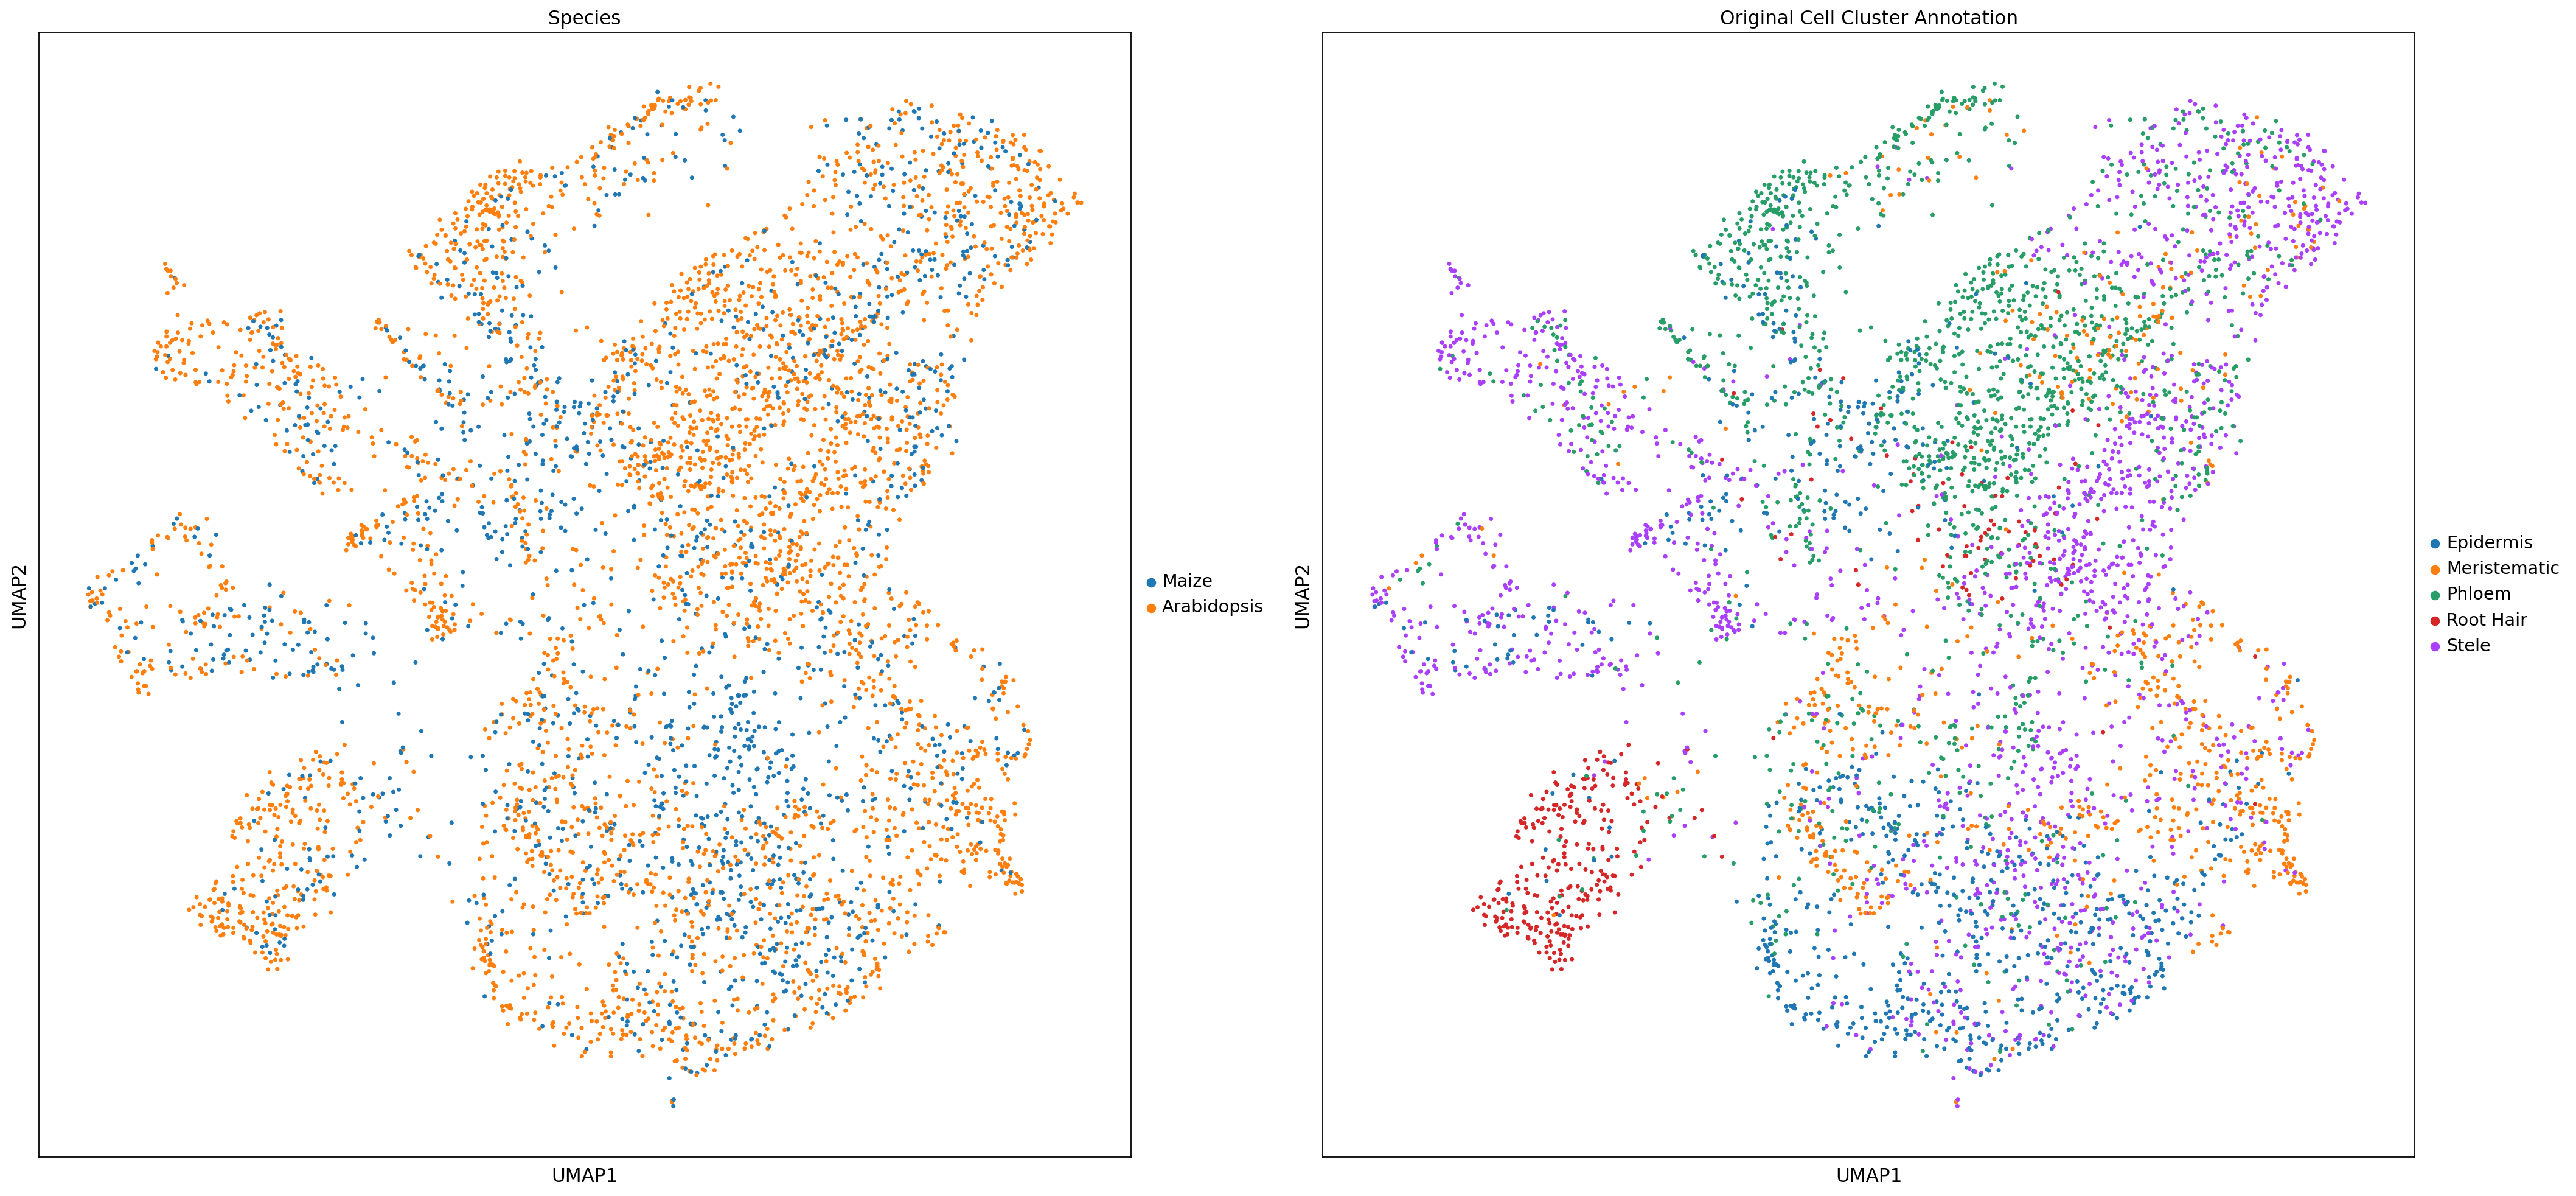

In [79]:
sc.pp.neighbors(subsampled_anndata_concat, n_neighbors = 10, n_pcs = 40, use_rep= 'X_scanorama', )
sc.tl.umap(subsampled_anndata_concat,)
sc.pl.umap(subsampled_anndata_concat, color= ['Species', 'Original Cell Cluster Annotation'], s = 40,)

In [80]:
sc.tl.leiden(subsampled_anndata_concat, resolution = .7)

In [82]:
subsampled_anndata_concat.obs

leiden Cell Cluster Annotation  \
TTAGTTCTCCATTCTA-Arabidopsis      1                  Phloem   
AAGGTTCCATAAAGGT-Arabidopsis      3                  Phloem   
GGGACCTGTAGTACCT-Arabidopsis      7               Epidermis   
AGTAGTCGTCGATTGT-Arabidopsis      6            Meristematic   
TAAGTGCCACATTCGA-Arabidopsis      9                   Stele   
...                             ...                     ...   
ATGAGTCCAAGAAACT-1-Maize         12                  Phloem   
CTCAATTTCATCGCCT-1-Maize          8                  Phloem   
TGGTTAGGTGTGCCTG-Arabidopsis      2                  Phloem   
TCAGGTACACAGAGCA-1-Maize          3               Root Hair   
ACGAGCCGTTTGACTG-Arabidopsis     11               Epidermis   

                             Cluster Before Gene Trimming  \
TTAGTTCTCCATTCTA-Arabidopsis                            0   
AAGGTTCCATAAAGGT-Arabidopsis                            8   
GGGACCTGTAGTACCT-Arabidopsis                            2   
AGTAGTCGTCGATTGT-Arabidopsis                            5   
TAAGTGCCACATTCGA-Arabidopsis                           15   
...                                                   ...   
ATGAGTCCAAGAAACT-1-Maize                                9   
CTCAATTTCATCGCCT-1-Maize                                9   
TGGTTAGGTGTGCCTG-Arabidopsis                            0   
TCAGGTACACAGAGCA-1-Maize                               14   
ACGAGCCGTTTGACTG-Arabidopsis                            2   

                             Original Cell Cluster Annotation Barcode  \
TTAGTTCTCCATTCTA-Arabidopsis                           Phloem     NaN   
AAGGTTCCATAAAGGT-Arabidopsis                           Phloem     NaN   
GGGACCTGTAGTACCT-Arabidopsis                        Epidermis     NaN   
AGTAGTCGTCGATTGT-Arabidopsis                     Meristematic     NaN   
TAAGTGCCACATTCGA-Arabidopsis                            Stele     NaN   
...                                                       ...     ...   
ATGAGTCCAAGAAACT-1-Maize                               Phloem     NaN   
CTCAATTTCATCGCCT-1-Maize                               Phloem     NaN   
TGGTTAGGTGTGCCTG-Arabidopsis                           Phloem     NaN   
TCAGGTACACAGAGCA-1-Maize                            Root Hair     NaN   
ACGAGCCGTTTGACTG-Arabidopsis                        Epidermis     NaN   

                                  Species  
TTAGTTCTCCATTCTA-Arabidopsis  Arabidopsis  
AAGGTTCCATAAAGGT-Arabidopsis  Arabidopsis  
GGGACCTGTAGTACCT-Arabidopsis  Arabidopsis  
AGTAGTCGTCGATTGT-Arabidopsis  Arabidopsis  
TAAGTGCCACATTCGA-Arabidopsis  Arabidopsis  
...                                   ...  
ATGAGTCCAAGAAACT-1-Maize            Maize  
CTCAATTTCATCGCCT-1-Maize            Maize  
TGGTTAGGTGTGCCTG-Arabidopsis  Arabidopsis  
TCAGGTACACAGAGCA-1-Maize            Maize  
ACGAGCCGTTTGACTG-Arabidopsis  Arabidopsis  

[5338 rows x 6 columns]

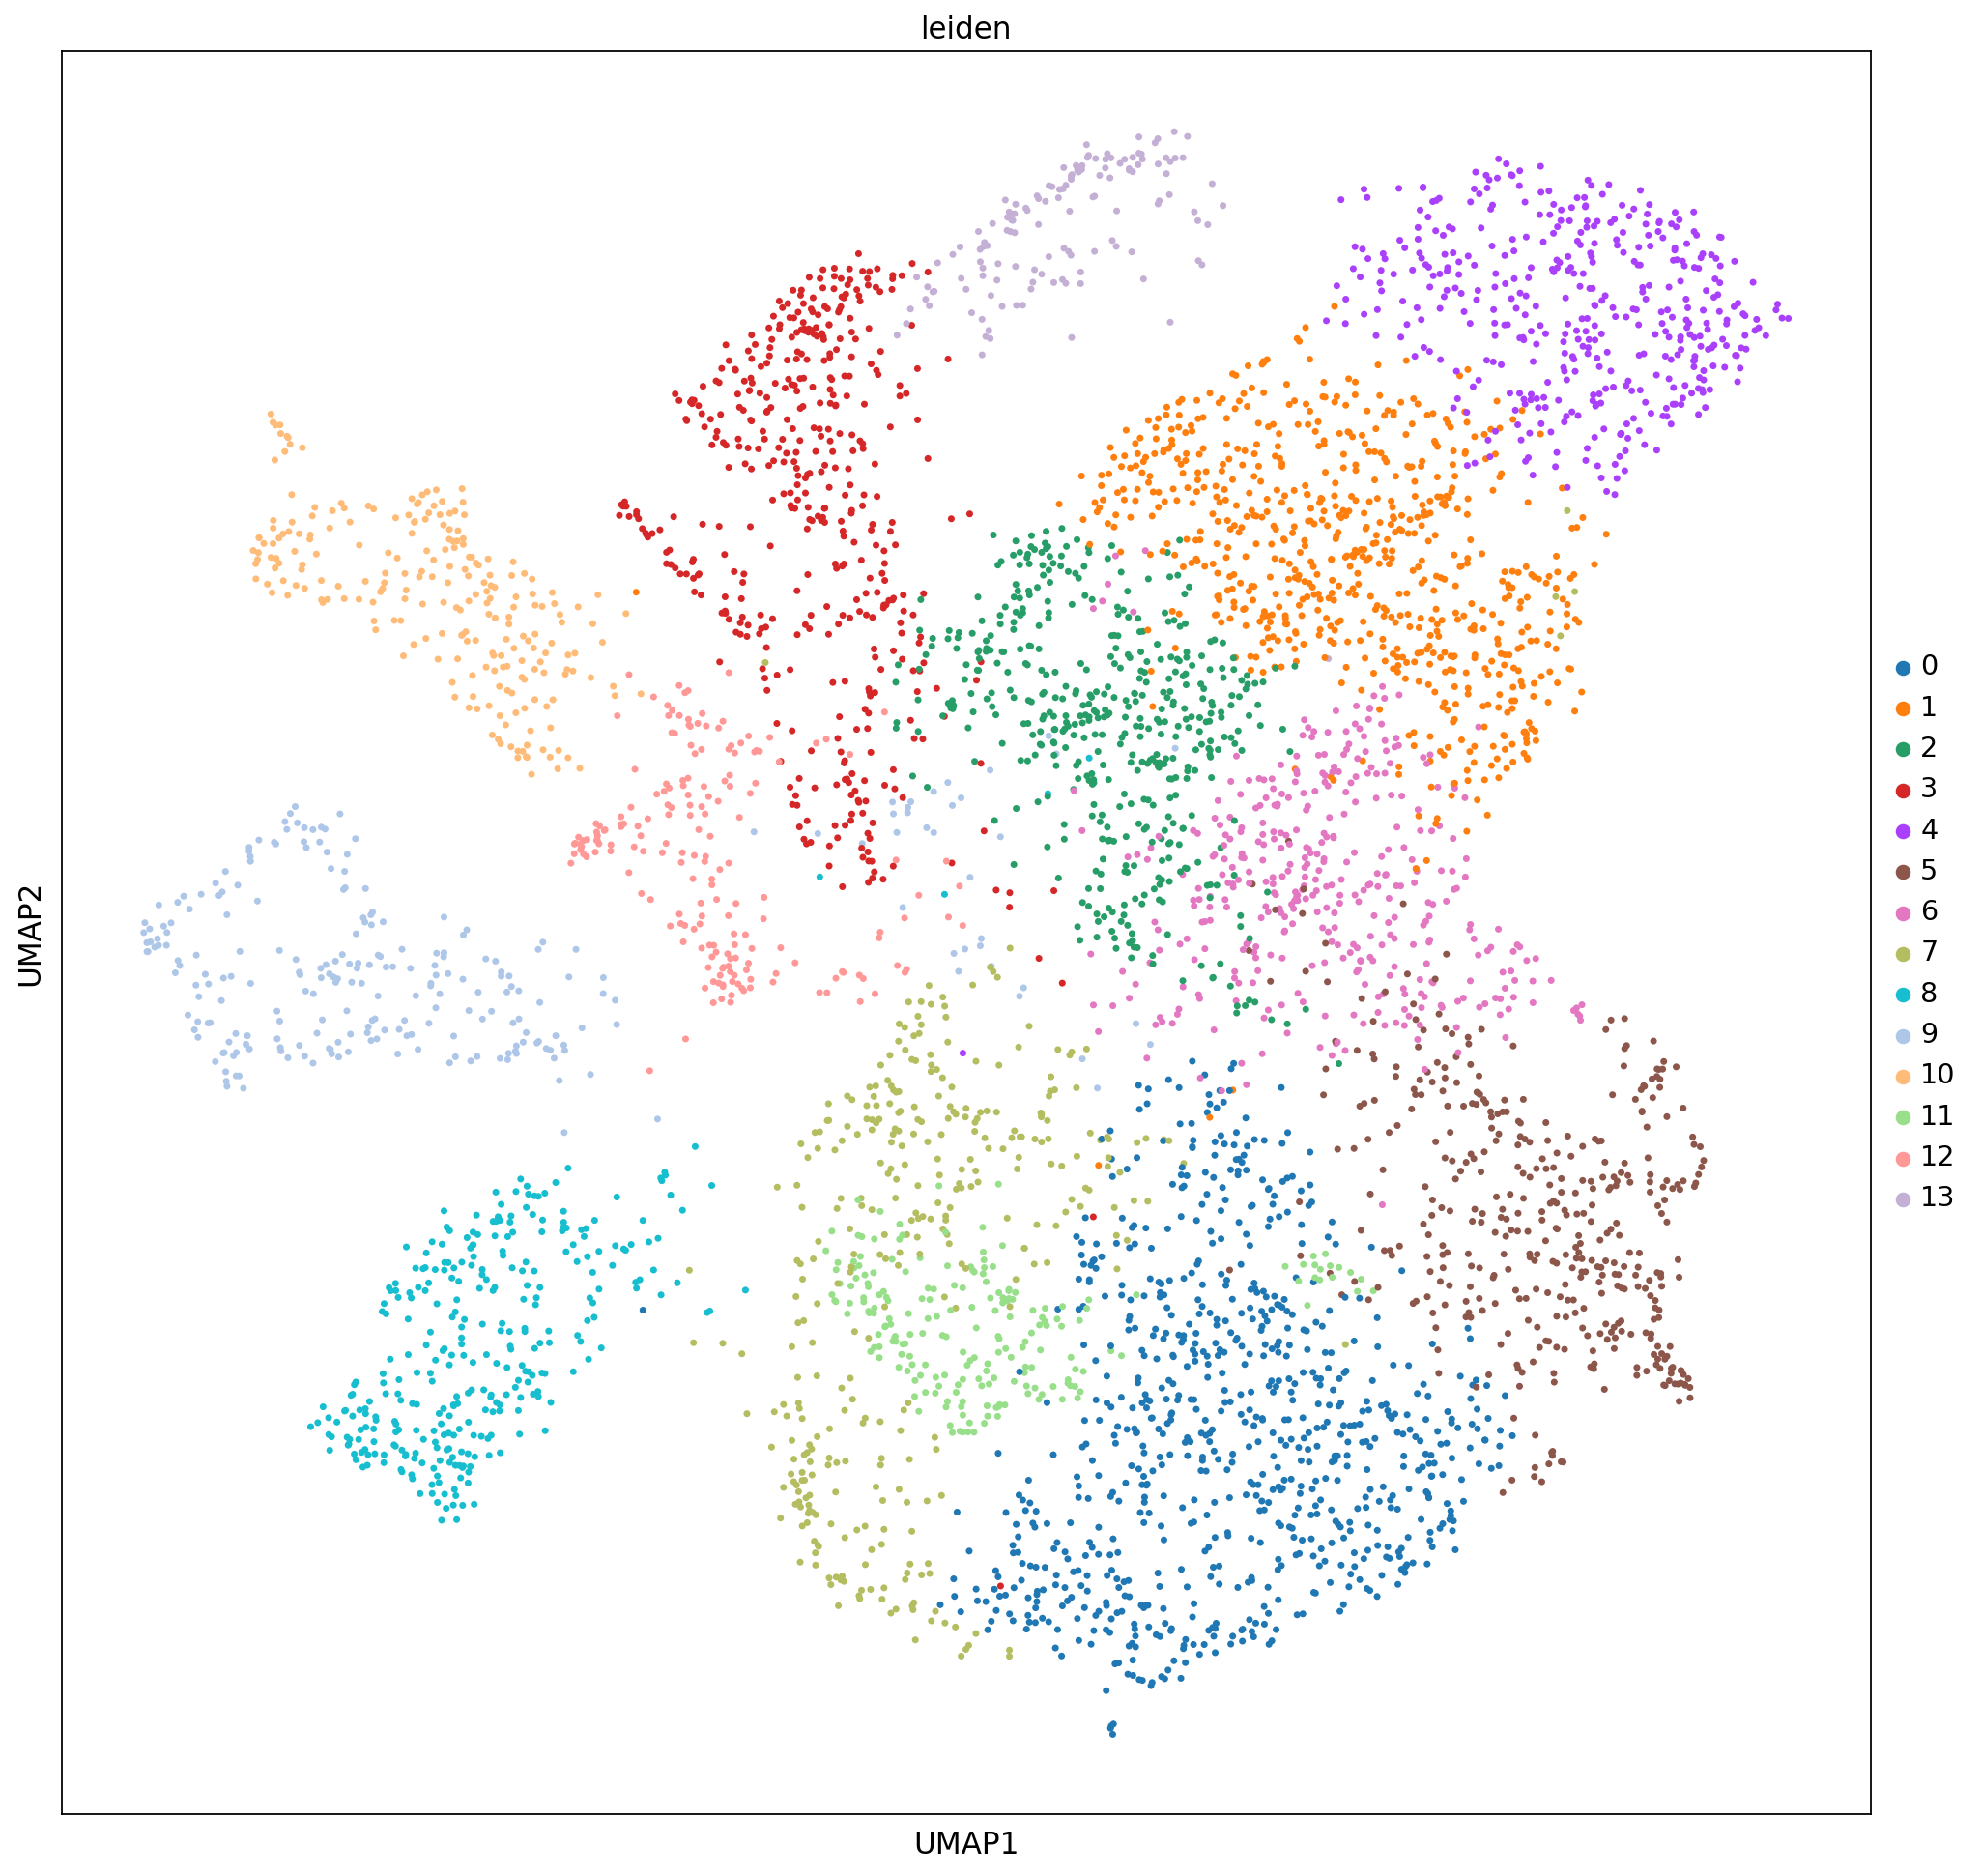

In [81]:
sc.pl.umap(subsampled_anndata_concat, color= ['leiden'], s = 40,)

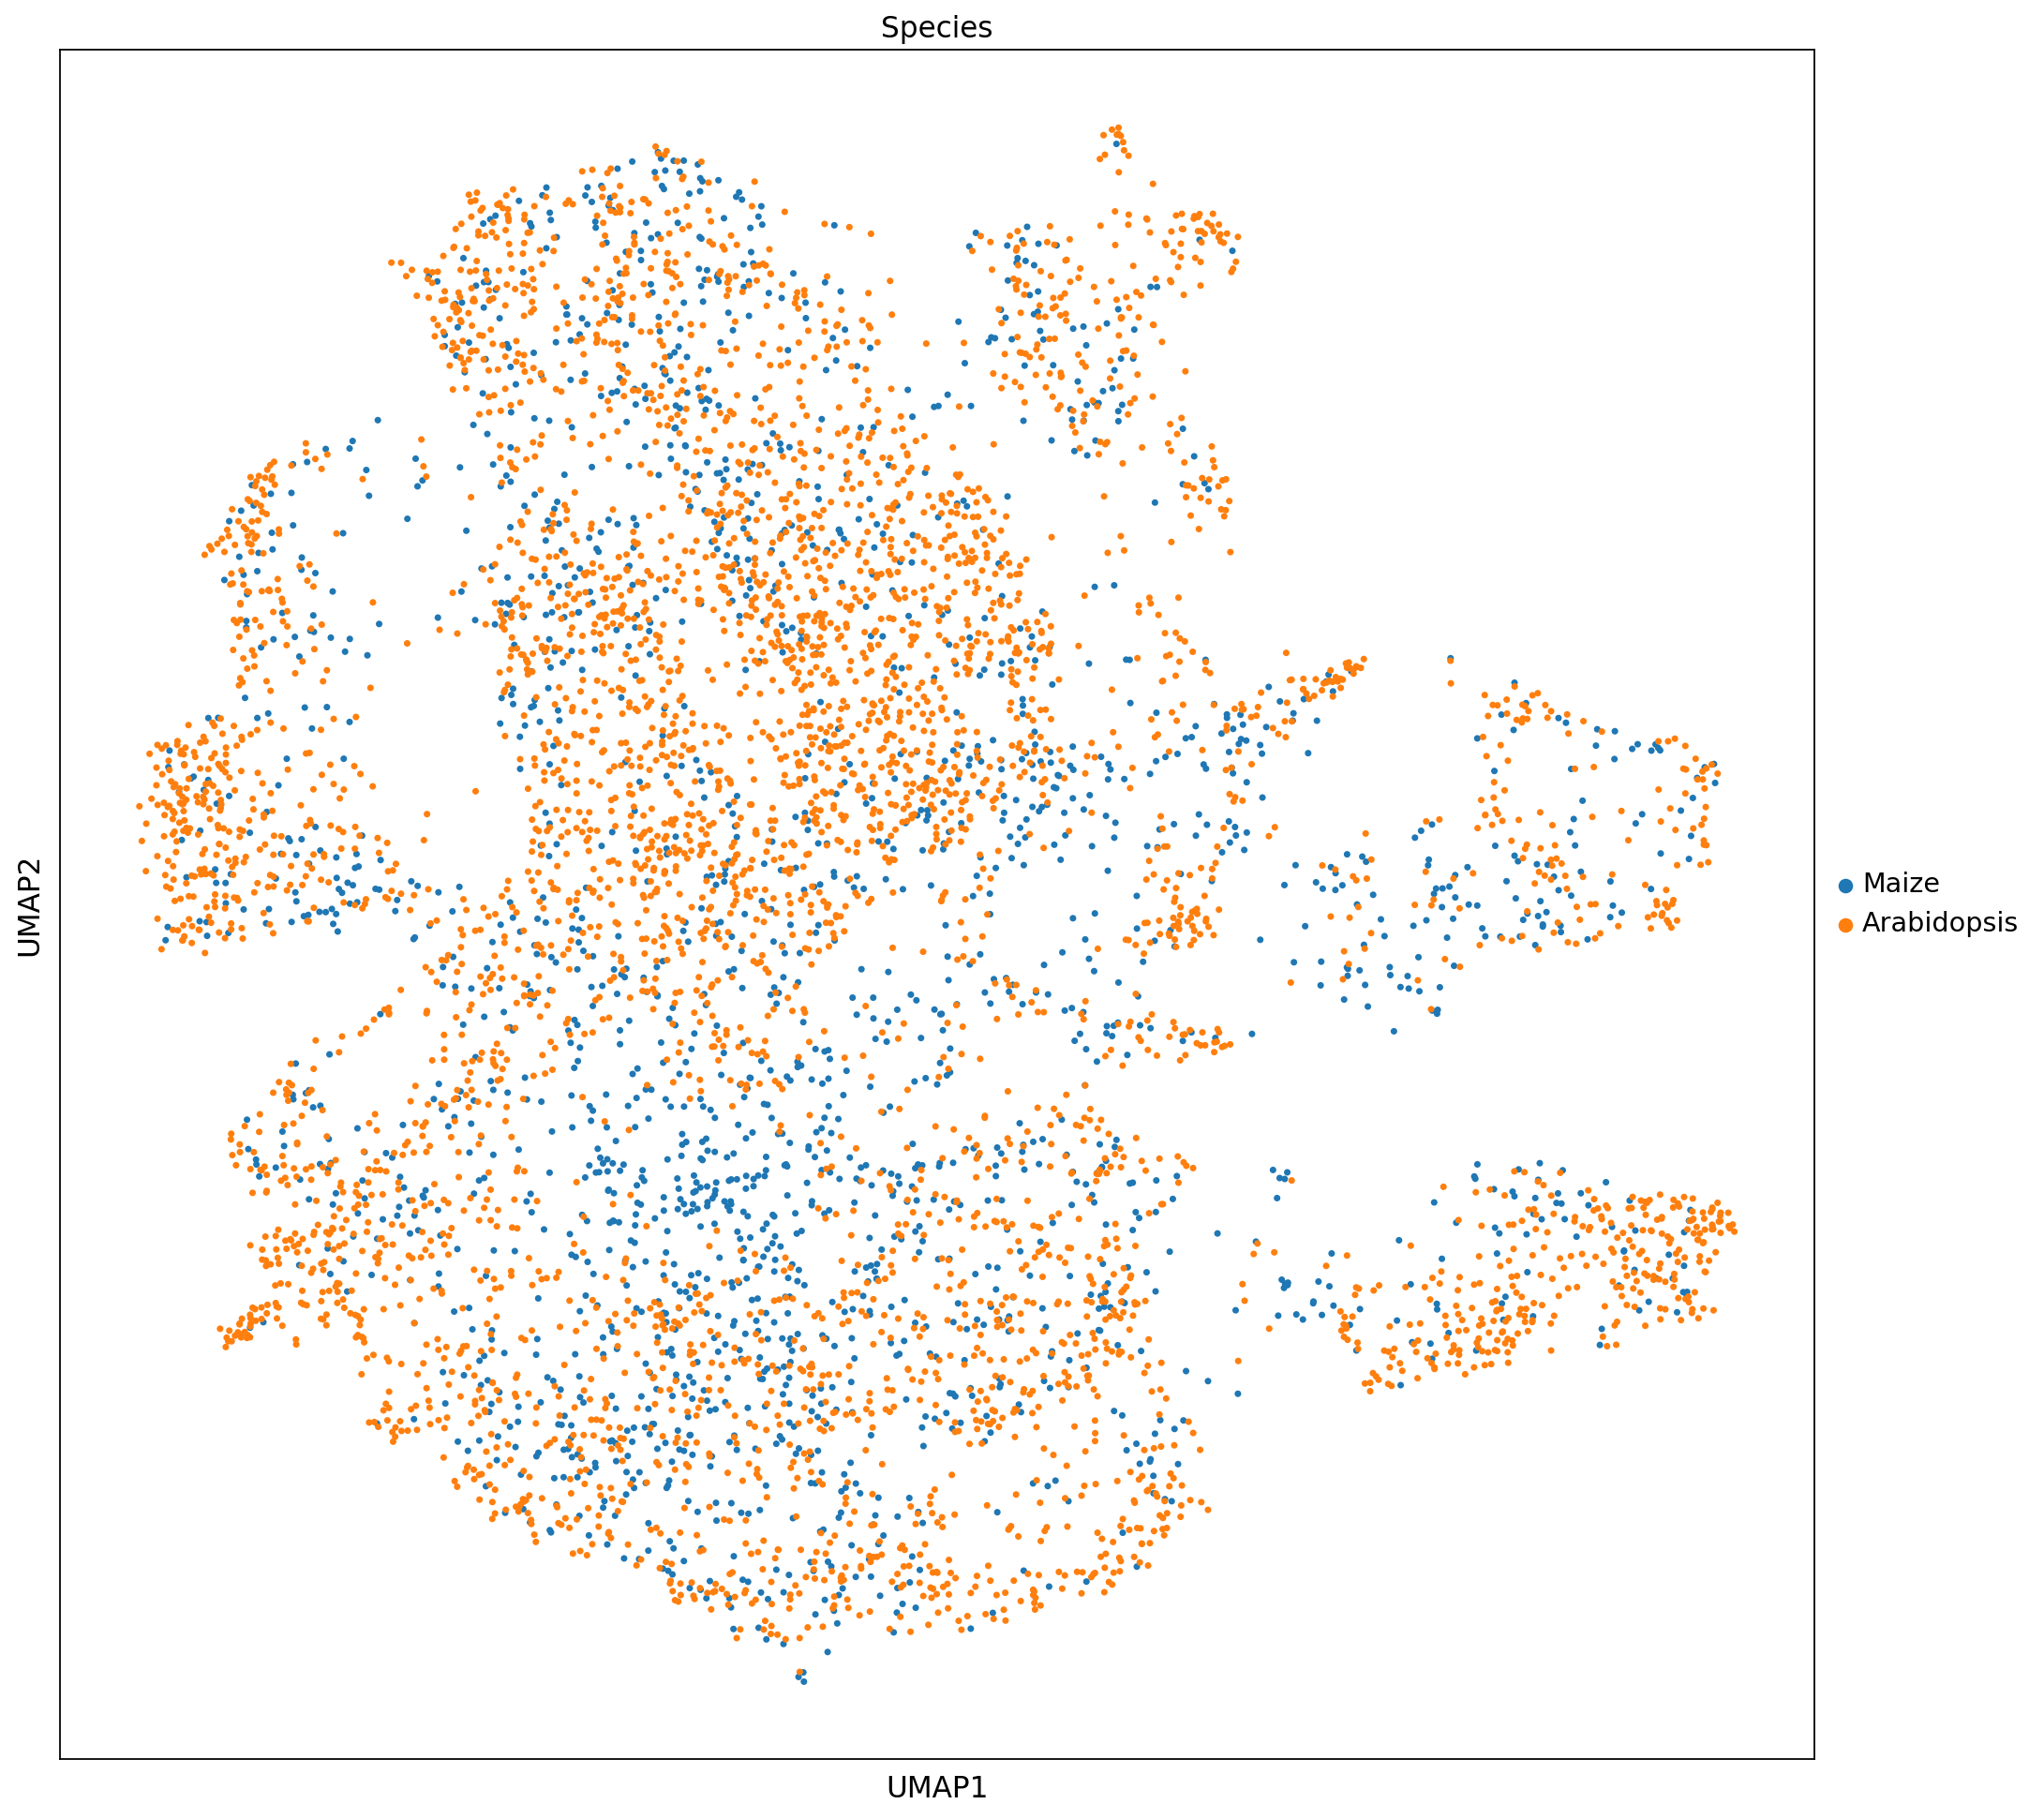

In [68]:
sc.pl.umap(concatendated_arabi_maize_dataset, color= ['Species', ], s = 40,)

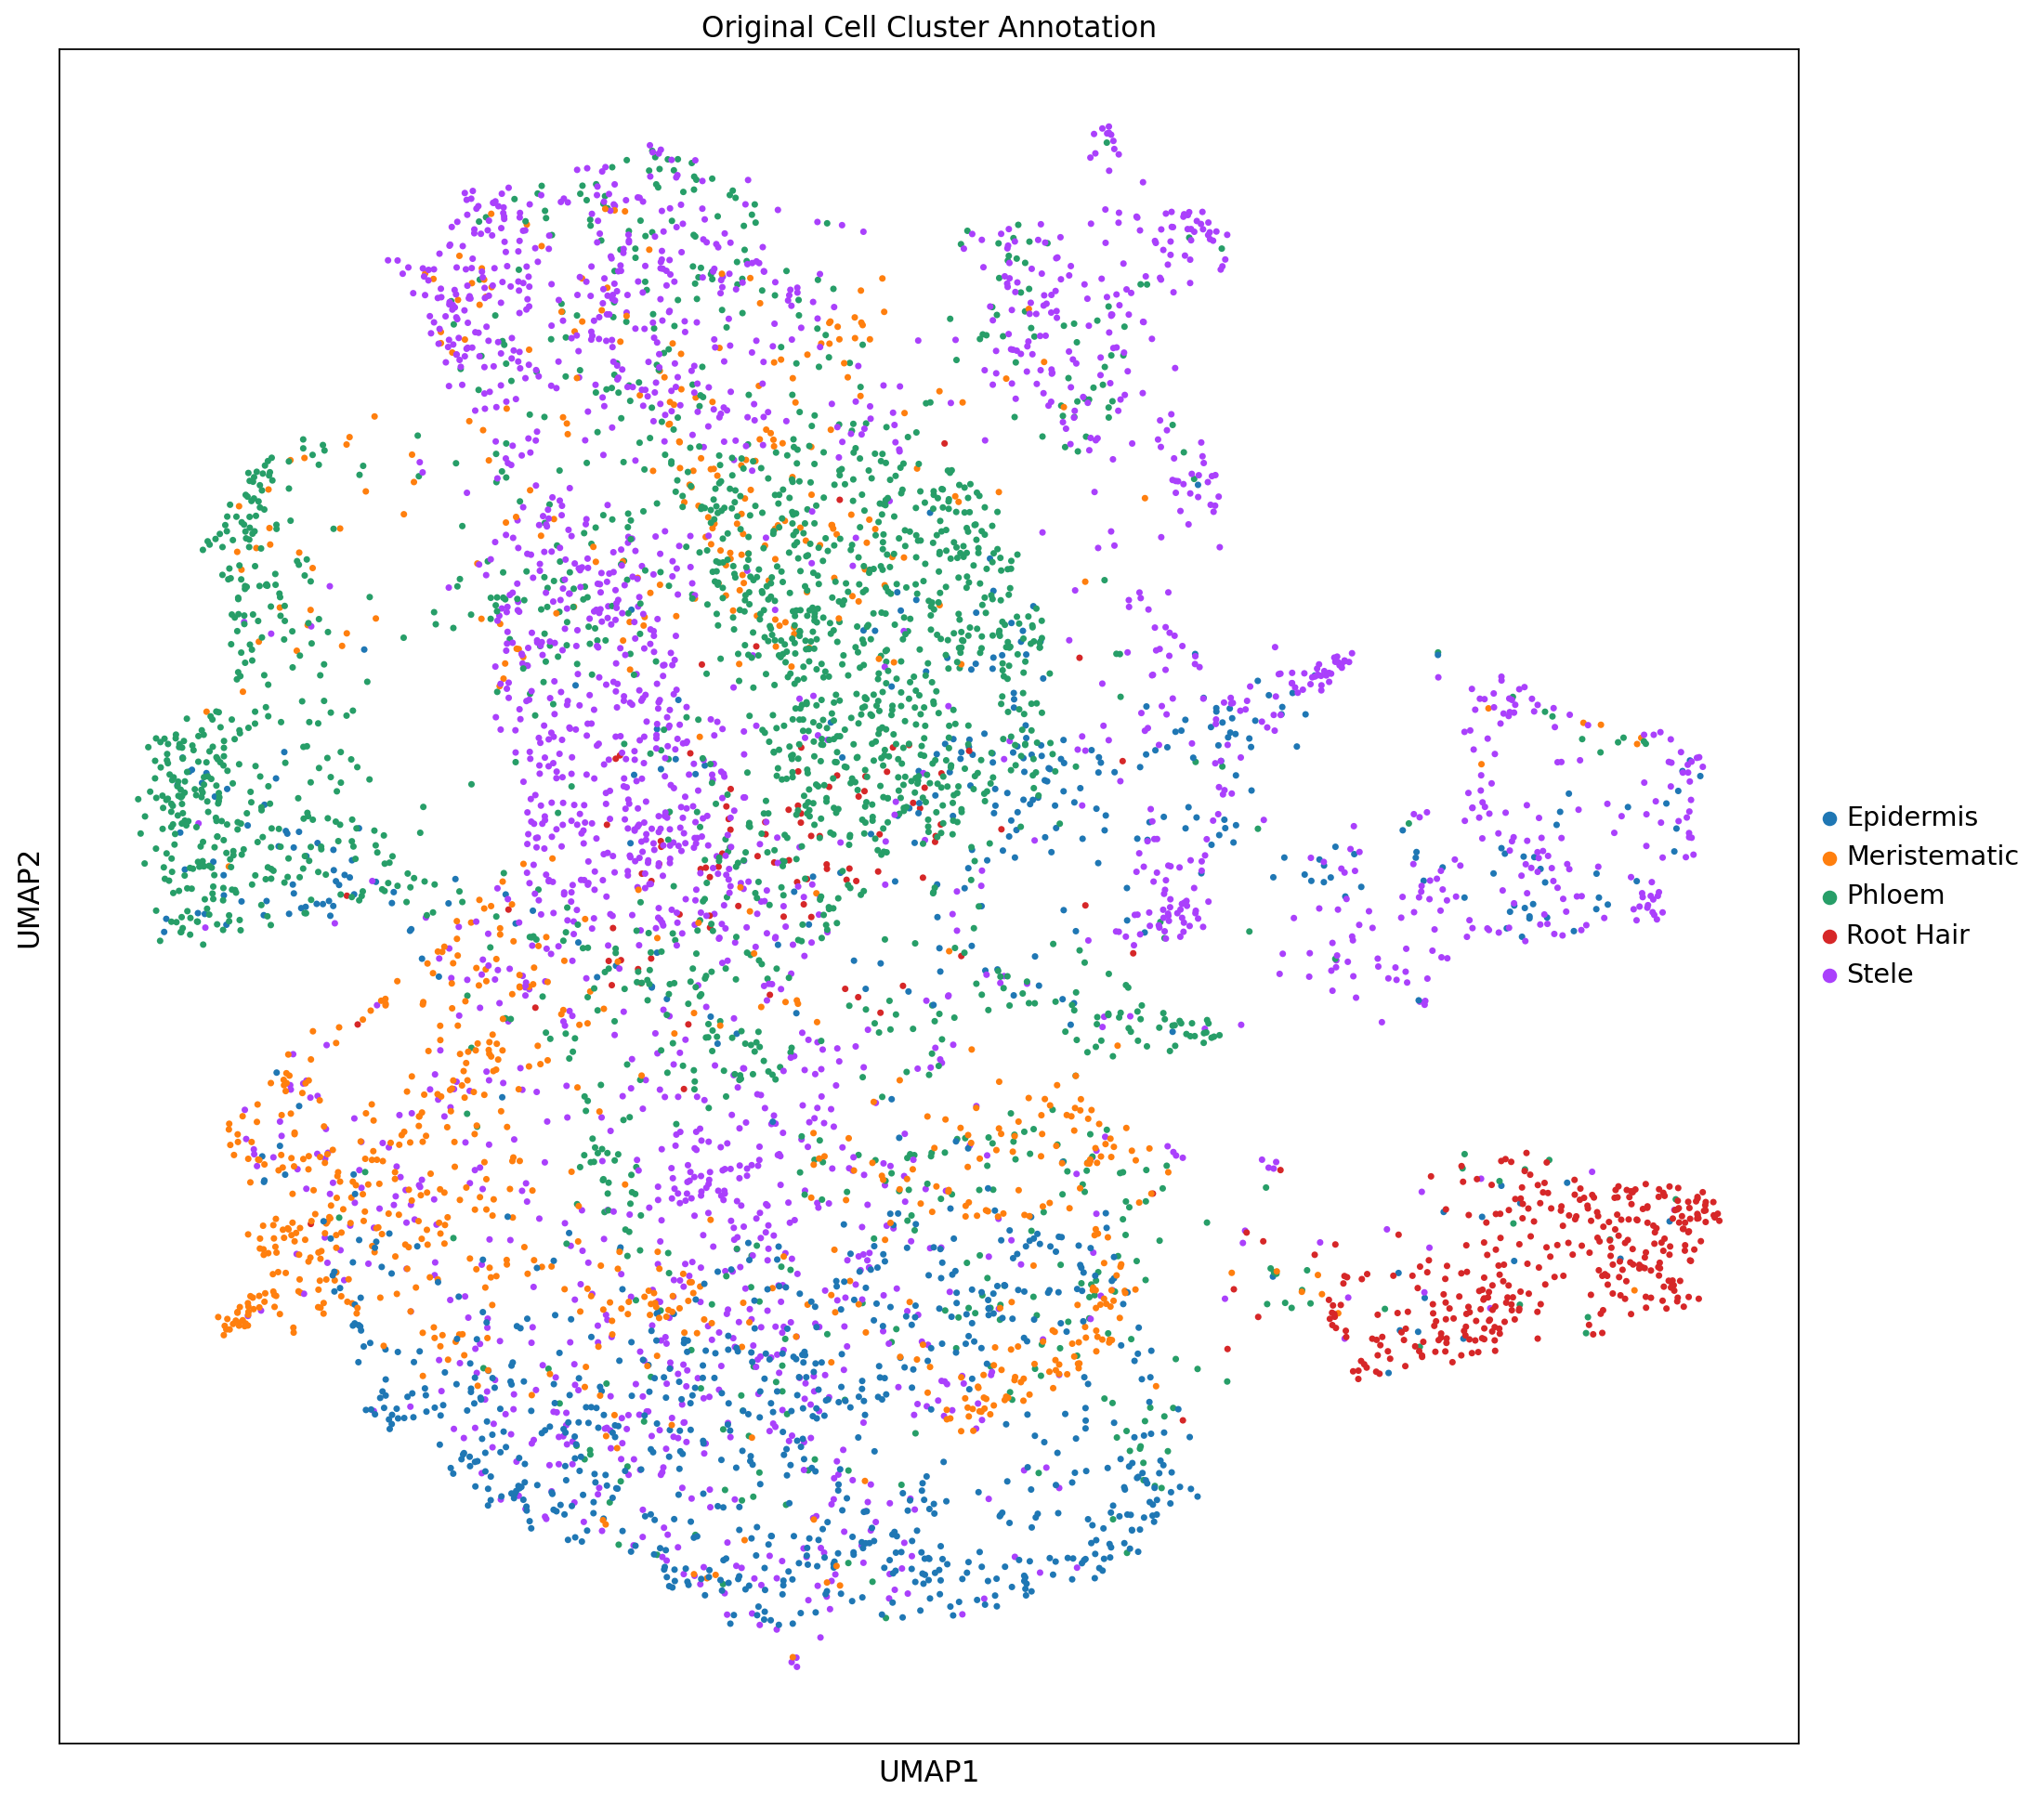

In [69]:
sc.pl.umap(concatendated_arabi_maize_dataset, color= ['Original Cell Cluster Annotation'], s = 40,)

In [70]:
sc.tl.leiden(concatendated_arabi_maize_dataset, resolution = .7)

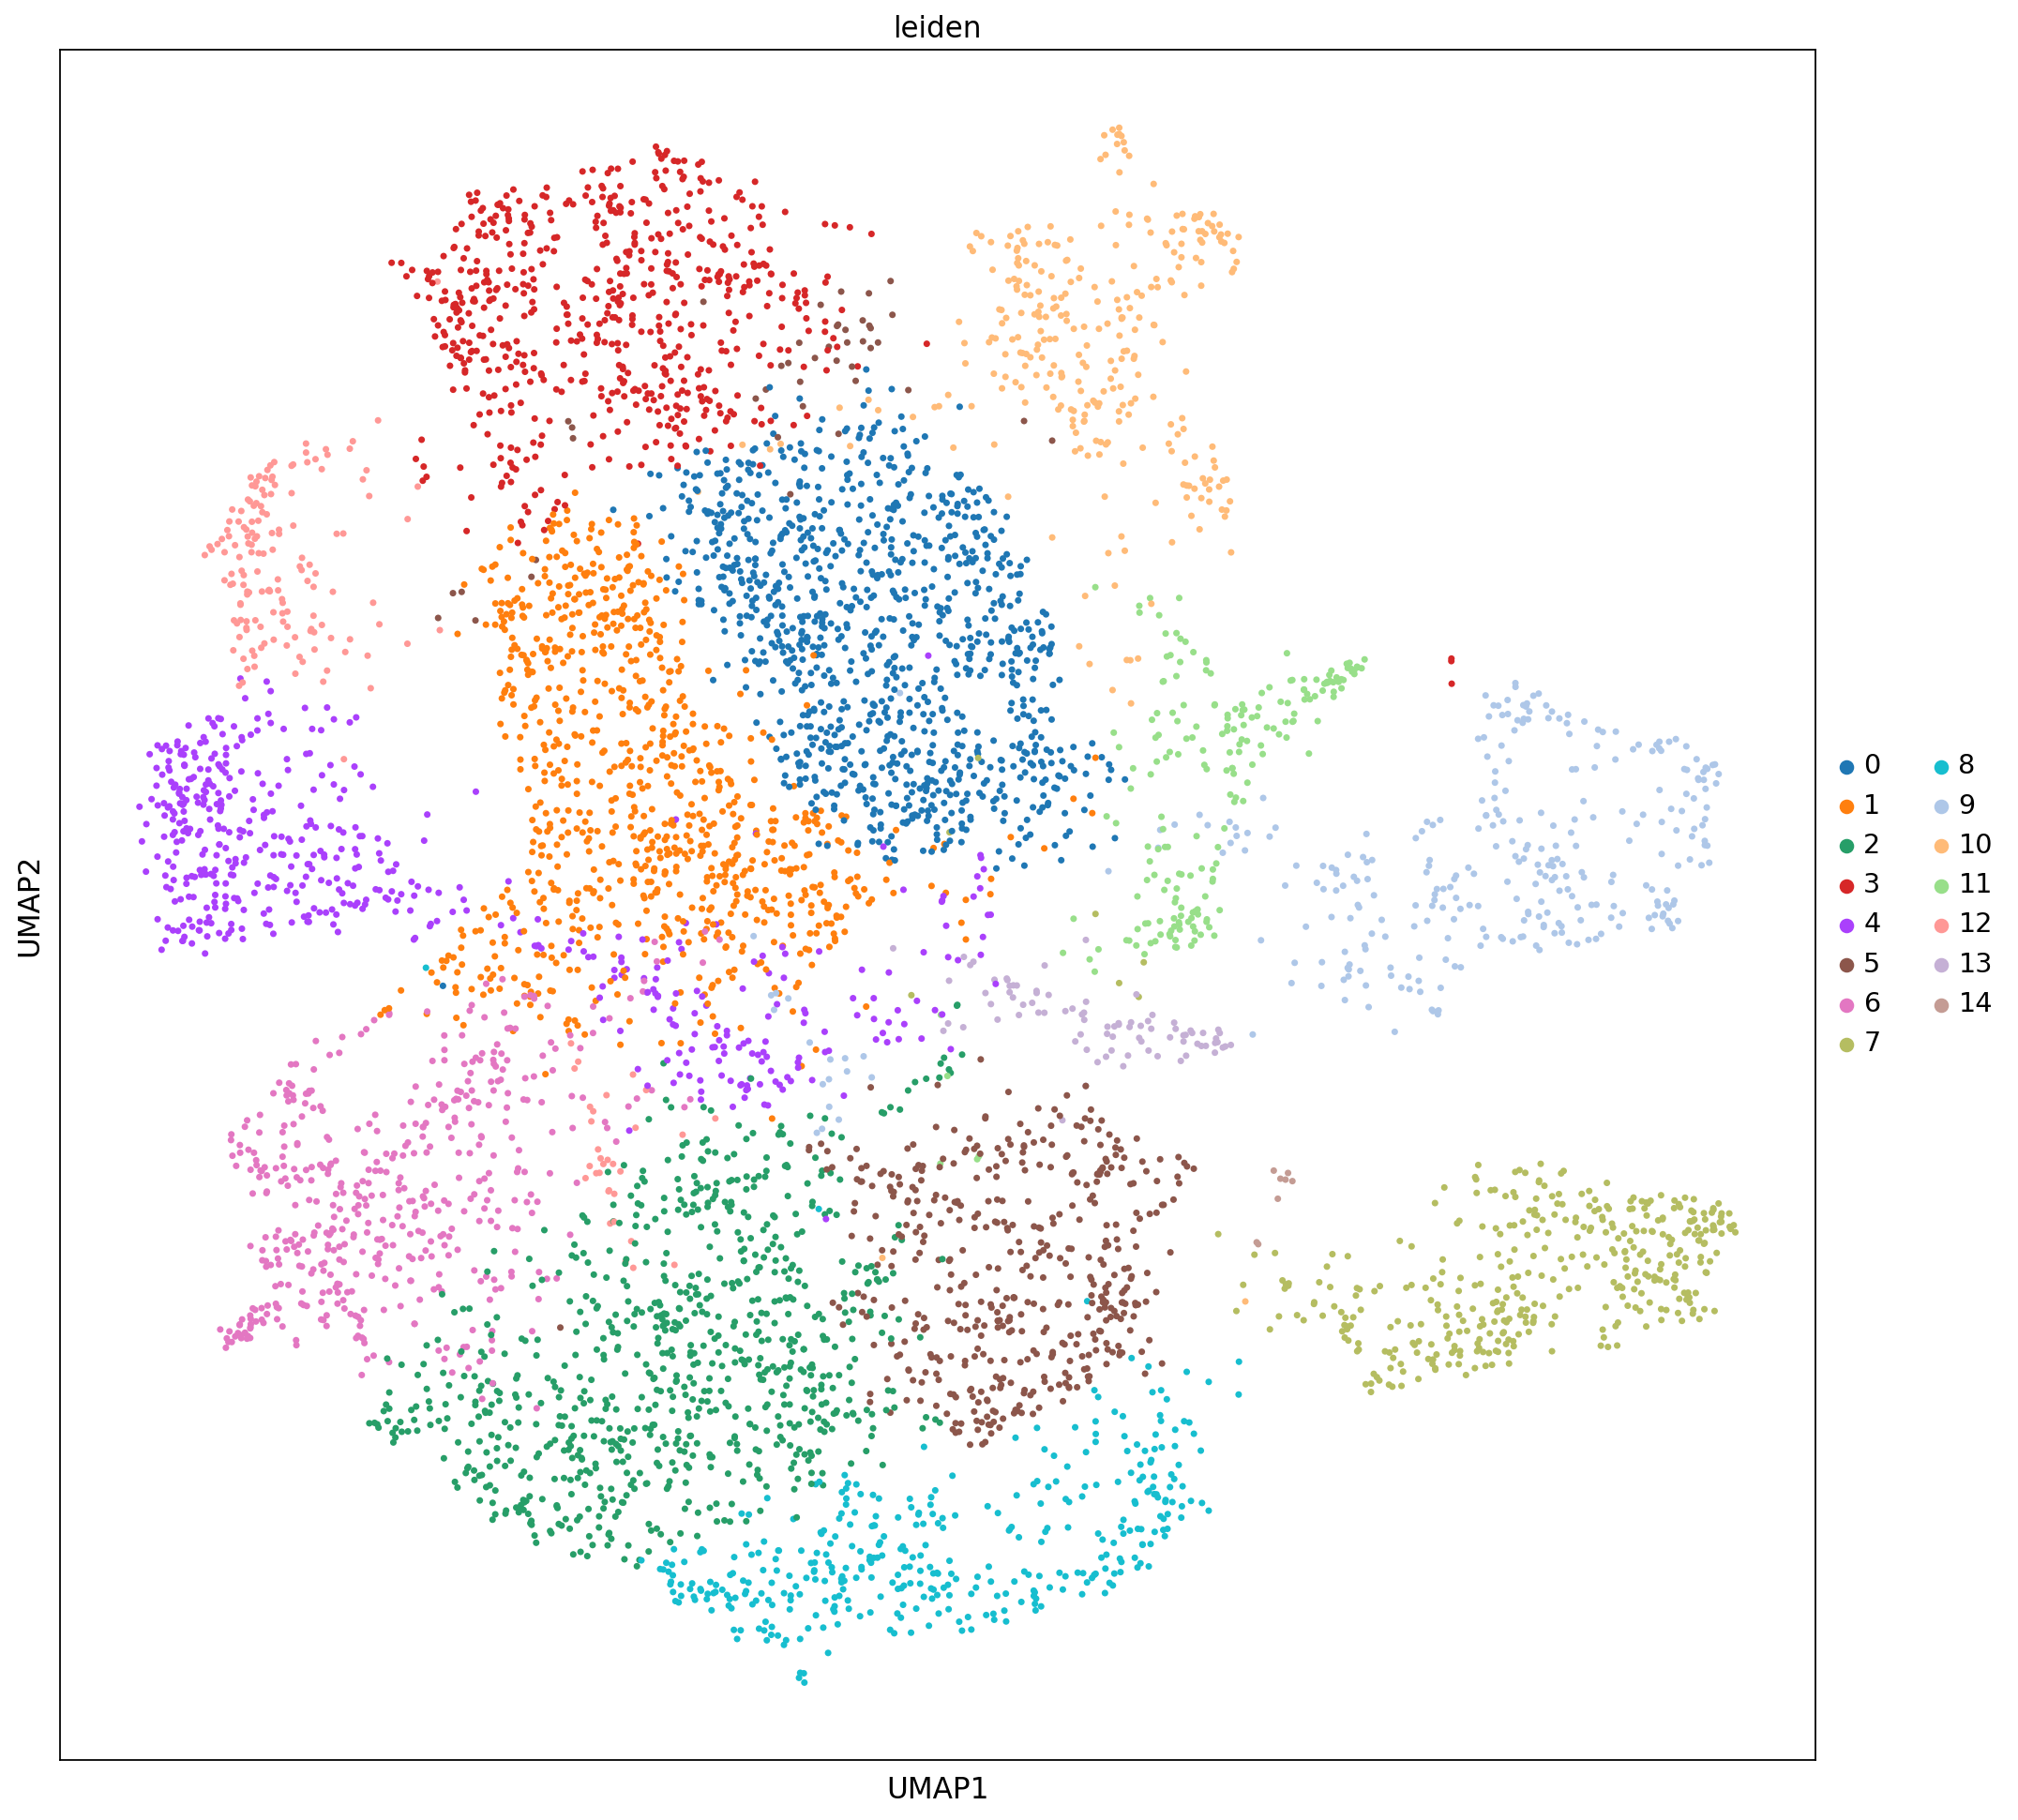

In [71]:
sc.pl.umap(concatendated_arabi_maize_dataset, color= ['leiden'], s = 40,)

In [72]:
import sklearn
sklearn.metrics.silhouette_score(concatendated_arabi_maize_dataset.X,concatendated_arabi_maize_dataset.obs['leiden'], metric = 'euclidean')

In [74]:
concatendated_arabi_maize_dataset.obs['Original Cell Cluster Annotation']

AAACCCAAGAGCAGCT-1-Maize               Stele
AAACCCAAGCACCGTC-1-Maize              Phloem
AAACCCAGTGATCATC-1-Maize               Stele
AAACCCATCAGACCCG-1-Maize               Stele
AAACGAACAGATAAAC-1-Maize              Phloem
                                    ...     
TTTGTCACAGGGCATA-Arabidopsis          Phloem
TTTGTCATCAAGGCTT-Arabidopsis           Stele
TTTGTCATCCCACTTG-Arabidopsis          Phloem
TTTGTCATCCTGCCAT-Arabidopsis    Meristematic
TTTGTCATCTCTGCTG-Arabidopsis          Phloem
Name: Original Cell Cluster Annotation, Length: 6672, dtype: category
Categories (5, object): ['Epidermis', 'Meristematic', 'Phloem', 'Root Hair', 'Stele']

In [75]:
concatendated_arabi_maize_dataset.obsm['X_umap']

array([[ 0.37408385,  3.8027766 ],
       [-1.5788851 , 13.2761345 ],
       [-3.258866  ,  5.2972355 ],
       ...,
       [-4.543319  , 10.165324  ],
       [ 1.8850272 ,  4.9080334 ],
       [-0.13628644, 11.41391   ]], dtype=float32)